In [ ]:
from google.colab import files
uploaded = files.upload()



Saving ecoli.fasta to ecoli.fasta


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yeast.fasta to yeast.fasta


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving humanmitochondria.fasta to humanmitochondria.fasta


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving thale cress.fasta to thale cress.fasta


In [ ]:
! pip install pandas numpy matplotlib scipy biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.0 MB/s eta 0:00:00


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy


In [ ]:
!pip install numpy pandas scikit-learn tensorflow imbalanced-learn optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install scikit-multilearn # Install the missing module

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.1 MB/s eta 0:00:00


In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Apple_chlorotic_leafspot _virus.fasta to Apple_chlorotic_leafspot _virus.fasta


In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import pandas as pd
import numpy as np
from Bio import SeqIO
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import ADASYN
from collections import Counter

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load sequences from FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, sample_size):
    sampled_sequences = []
    total_length = 0
    while total_length < sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            segment = seq[start:start + segment_length]
        else:
            segment = seq
        sampled_sequences.append(segment)
        total_length += len(segment)

    combined_sequence = ''.join(sampled_sequences)
    return combined_sequence[:sample_size]

# Path to the virus FASTA file
virus_path = '/content/Apple_chlorotic_leafspot _virus.fasta'  # Virus sequences file path

# Load virus sequences
virus_sequences = load_fasta(virus_path)

# Define sample size (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample virus sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame
data = pd.DataFrame({
    'sequence': [sampled_virus_sequences],
    'host_label': ['virus']
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# Step 3: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Step 4: Label Encoding
mlb = MultiLabelBinarizer()
data['label'] = data.apply(lambda row: [row['sequence'], row['host_label']], axis=1)
y = mlb.fit_transform(data['label'])

# Check class distribution
class_counts = Counter(data['host_label'])
print("Class distribution before resampling:", class_counts)

# Step 5: Handle Class Imbalance with ADASYN (if needed)
X = np.array(data['bert_embeddings'].tolist())

try:
    adasyn = ADASYN()
    X_resampled, y_resampled = adasyn.fit_resample(X, y)
    print("Class distribution after resampling:", Counter(mlb.inverse_transform(y_resampled)))
except ValueError as e:
    print("ADASYN resampling not applied:", e)
    X_resampled, y_resampled = X, y

# Now you can proceed with model training and evaluation as per your original plan


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Class distribution before resampling: Counter({'virus': 1})
ADASYN resampling not applied: Imbalanced-learn currently supports binary, multiclass and binarized encoded multiclasss targets. Multilabel and multioutput targets are not supported.


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 319, 'dropout_rate': 0.2182330846997753}
Epoch 1/50
2/2 [==============================] - 1s 190ms/step - loss: 0.7787 - accuracy: 0.4688 - val_loss: 0.5242 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 42ms/step - loss: 0.7400 - accuracy: 0.5938 - val_loss: 0.4906 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 42ms/step - loss: 0.7119 - accuracy: 0.5000 - val_loss: 0.4606 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 45ms/step - loss: 0.6657 - accuracy: 0.5625 - val_loss: 0.4263 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 0.6261 - accuracy: 0.6562 - val_loss: 0.3861 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6034 - accuracy: 0.7812 - val_loss: 0.3561 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 52ms/step - loss: 0.5788 - accuracy: 0.

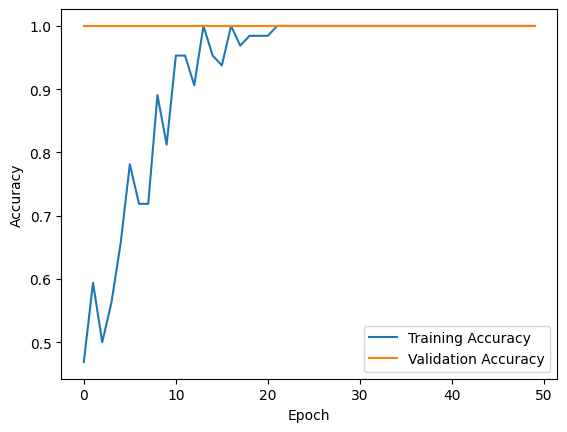

1/1 [==============================] - 0s 138ms/step


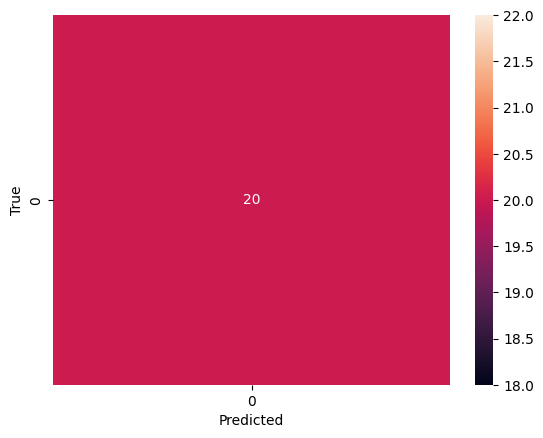

              precision    recall  f1-score   support

       virus       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load sequences from the given FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = '/content/Apple_chlorotic_leafspot_virus.fasta'

# Load sequences
virus_sequences = load_fasta(virus_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'label': ['virus'] * len(sampled_virus_sequences)
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1), target_names=mlb.classes_)
print(report)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 447, 'dropout_rate': 0.2615285285619826}
Epoch 1/50
2/2 [==============================] - 1s 327ms/step - loss: 0.7383 - accuracy: 0.3906 - val_loss: 0.6337 - val_accuracy: 0.2500
Epoch 2/50
2/2 [==============================] - 0s 94ms/step - loss: 0.6430 - accuracy: 0.5469 - val_loss: 0.6129 - val_accuracy: 0.2500
Epoch 3/50
2/2 [==============================] - 0s 84ms/step - loss: 0.6055 - accuracy: 0.5469 - val_loss: 0.5994 - val_accuracy: 0.2500
Epoch 4/50
2/2 [==============================] - 0s 96ms/step - loss: 0.5834 - accuracy: 0.5781 - val_loss: 0.5857 - val_accuracy: 0.2500
Epoch 5/50
2/2 [==============================] - 0s 77ms/step - loss: 0.5463 - accuracy: 0.5938 - val_loss: 0.5696 - val_accuracy: 0.2500
Epoch 6/50
2/2 [==============================] - 0s 85ms/step - loss: 0.5190 - accuracy: 0.6094 - val_loss: 0.5550 - val_accuracy: 0.2500
Epoch 7/50
2/2 [==============================] - 0s 97ms/step - loss: 0.5139 - accuracy: 0.

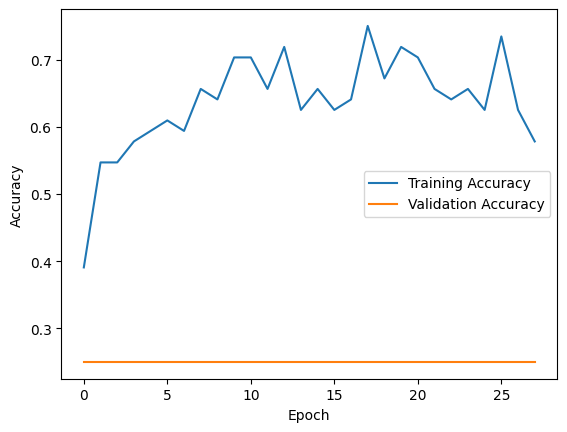

1/1 [==============================] - 0s 102ms/step


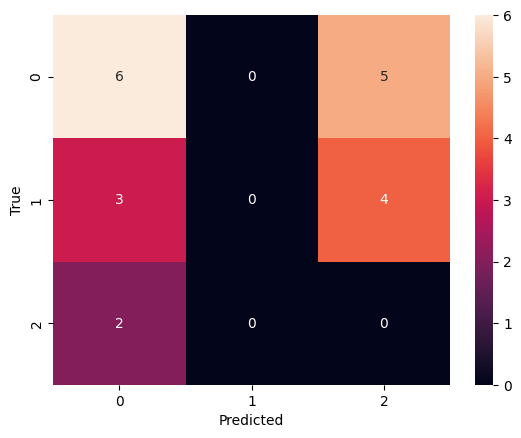

                precision    recall  f1-score   support

drug_resistant       0.55      0.55      0.55        11
    pathogenic       0.00      0.00      0.00        16
         virus       1.00      1.00      1.00        20

     micro avg       0.84      0.55      0.67        47
     macro avg       0.52      0.52      0.52        47
  weighted avg       0.55      0.55      0.55        47
   samples avg       0.88      0.58      0.66        47



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from Bio import SeqIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics import confusion_matrix, classification_report

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Load sequences from the given FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Path to the provided FASTA file
virus_path = '/content/Apple_chlorotic_leafspot_virus.fasta'

# Load sequences
virus_sequences = load_fasta(virus_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame with sequences and host labels
# Simulate multiple labels
labels = [['virus'], ['virus', 'pathogenic'], ['virus', 'drug_resistant'],
          ['virus', 'pathogenic', 'drug_resistant']]
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'label': [random.choice(labels) for _ in range(len(sampled_virus_sequences))]
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'])

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Since it's multi-label, we'll use a multilabel confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_test, y_pred_classes, target_names=mlb.classes_)
print(report)


In [ ]:
!pip install scikit-multilearn

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 375, 'dropout_rate': 0.22030861546892322}
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 0.8761 - accuracy: 0.2031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 1s 484ms/step - loss: 0.8761 - accuracy: 0.2031 - val_loss: 0.7333 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 126ms/step - loss: 0.8776 - accuracy: 0.2031 - val_loss: 0.7791 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 101ms/step - loss: 0.8227 - accuracy: 0.1562 - val_loss: 0.7806 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 102ms/step - loss: 0.7233 - accuracy: 0.2812 - val_loss: 0.7952 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 111ms/step - loss: 0.7063 - accuracy: 0.3281 - val_loss: 0.8206 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 219ms/step - loss: 0.7331 - accuracy: 1.0000
Final Model Accuracy: 100.00%


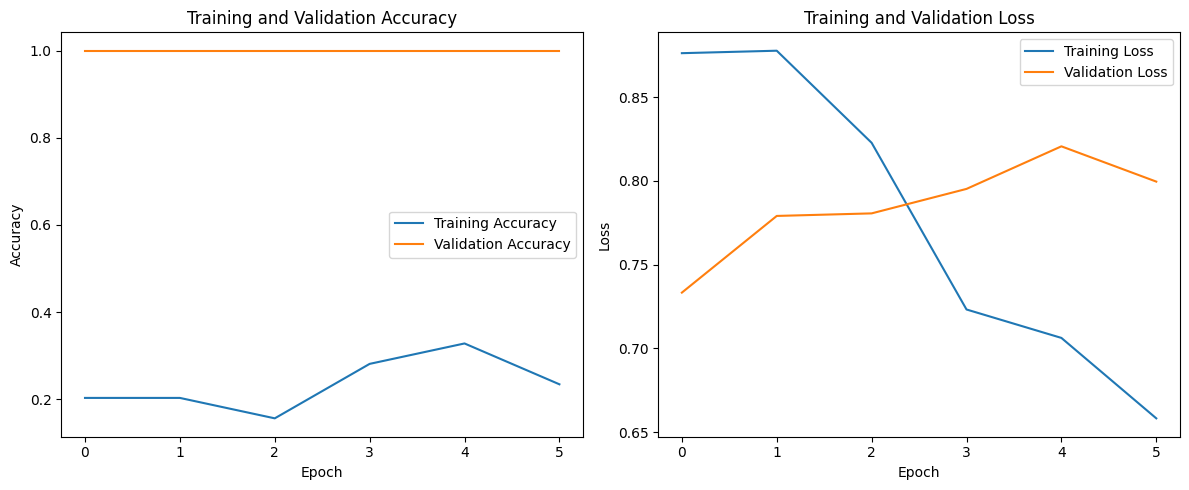

1/1 [==============================] - 0s 72ms/step


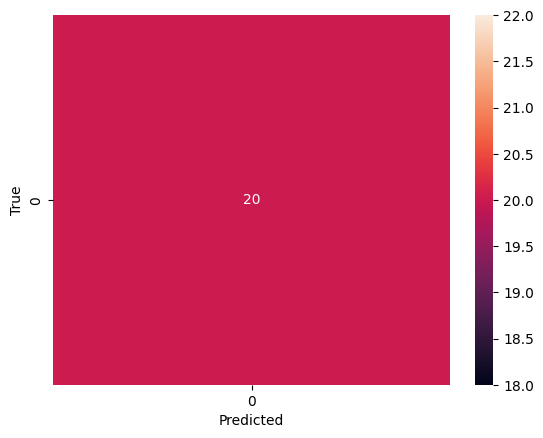

                precision    recall  f1-score   support

 unknown_clade       1.00      1.00      1.00        20
 unknown_class       0.00      0.00      0.00        20
unknown_family       1.00      0.20      0.33        20

     micro avg       1.00      0.40      0.57        60
     macro avg       0.67      0.40      0.44        60
  weighted avg       0.67      0.40      0.44        60
   samples avg       1.00      0.40      0.56        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from transformers import BertTokenizer, TFBertModel
from imblearn.over_sampling import SMOTE
from Bio import SeqIO

# Load sequences and metadata from the given FASTA file
def load_fasta_with_metadata(file_path):
    sequences = []
    metadata = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        metadata.append(record.description)
    return sequences, metadata

# Extract family, class, and clade information from metadata
def extract_labels(metadata):
    families = []
    classes = []
    clades = []
    for description in metadata:
        family = description.split('family:')[1].split(' ')[0] if 'family:' in description else 'unknown_family'
        clade = description.split('clade:')[1].split(' ')[0] if 'clade:' in description else 'unknown_clade'
        cls = description.split('class:')[1].split(' ')[0] if 'class:' in description else 'unknown_class'
        families.append(family)
        classes.append(cls)
        clades.append(clade)
    return families, classes, clades

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = '/content/Apple_chlorotic_leafspot_virus.fasta'

# Load sequences and metadata
virus_sequences, virus_metadata = load_fasta_with_metadata(virus_path)

# Extract labels from metadata
families, classes, clades = extract_labels(virus_metadata)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame for sampled sequences and labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'family': [random.choice(families) for _ in range(len(sampled_virus_sequences))],
    'class': [random.choice(classes) for _ in range(len(sampled_virus_sequences))],
    'clade': [random.choice(clades) for _ in range(len(sampled_virus_sequences))]
})

# Combine labels for multi-label classification
data['label'] = data.apply(lambda row: [row['family'], row['class'], row['clade']], axis=1)

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'])

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance using SMOTE
def smote_oversample(X, y):
    smote = SMOTE()
    X_resampled_list = []
    y_resampled_list = []
    for i in range(y.shape[1]):
        if len(np.unique(y[:, i])) > 1:  # Ensure there are at least 2 classes
            X_res, y_res = smote.fit_resample(X, y[:, i])
            X_resampled_list.append(X_res) # Append each resampled array to the list
            y_resampled_list.append(y_res)
        else:
            X_resampled_list.append(X) # If no resampling, append the original data
            y_resampled_list.append(y[:, i])

    # Find the maximum number of rows among resampled arrays
    max_length = max([arr.shape[0] for arr in X_resampled_list])

    # Pad arrays to have the same number of rows for hstack and column_stack
    X_resampled_padded = [np.pad(arr, ((0, max_length - arr.shape[0]), (0, 0)))
                           for arr in X_resampled_list]
    y_resampled_padded = [np.pad(arr, (0, max_length - arr.shape[0]))
                           for arr in y_resampled_list]

    # Now perform hstack and column_stack
    X_resampled = np.hstack(X_resampled_padded) # Use hstack to combine features horizontally
    y_resampled = np.column_stack(y_resampled_padded)
    return X_resampled, y_resampled

X_resampled, y_resampled = smote_oversample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train.argmax(axis=1)),
                                     y=y_train.argmax(axis=1))
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0, class_weight=class_weights)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training with early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], class_weight=class_weights)

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Multilabel confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=mlb.classes_)
print(report)


In [ ]:
!pip install scikit-multilearn iterative-stratification


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 243, 'dropout_rate': 0.3298881518814837}
Epoch 1/50
2/2 [==============================] - 1s 421ms/step - loss: 0.8821 - accuracy: 0.2812 - val_loss: 0.6415 - val_accuracy: 0.0000e+00
Epoch 2/50
1/2 [==============>...............] - ETA: 0s - loss: 0.8104 - accuracy: 0.3125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 95ms/step - loss: 0.8033 - accuracy: 0.2656 - val_loss: 0.6426 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 195ms/step - loss: 0.7593 - accuracy: 0.3594 - val_loss: 0.5763 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 223ms/step - loss: 0.6918 - accuracy: 0.3438 - val_loss: 0.5035 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 6s 6s/step - loss: 0.7014 - accuracy: 0.2656 - val_loss: 0.4573 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 345ms/step - loss: 0.7030 - accuracy: 0.3281 - val_loss: 0.4362 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 1s 773ms/step - loss: 0.6643 - accuracy: 0.3594 - val_loss: 0.4173 - val_accuracy: 0.0000e+00
Epoch 8/50
2/2 [==============================] - 1s 470ms/step - loss: 0.6513 - accuracy: 0.3125 - val_loss: 0.3951 - val_accuracy: 0.0000e+00
Epoch 9

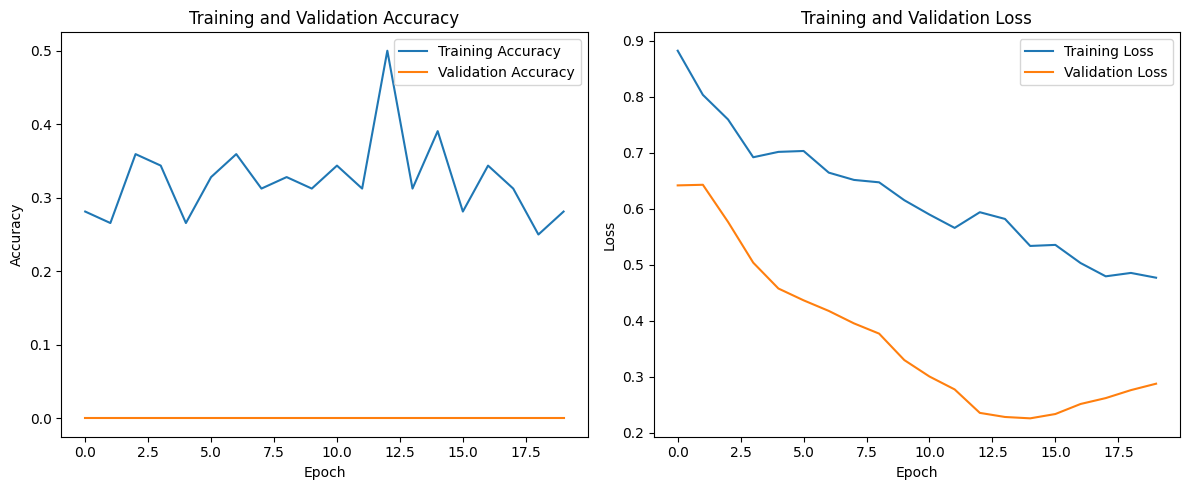

1/1 [==============================] - 0s 75ms/step


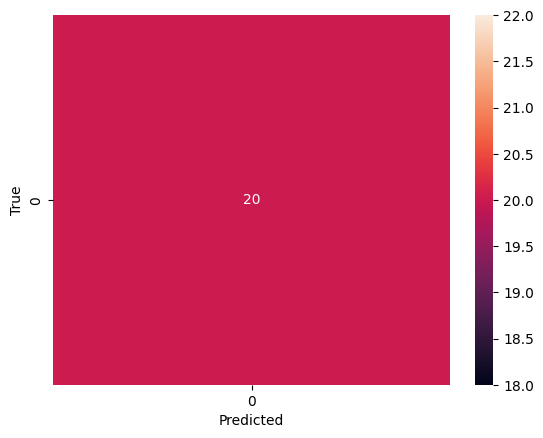

                precision    recall  f1-score   support

 unknown_clade       1.00      1.00      1.00        20
 unknown_class       1.00      1.00      1.00        20
unknown_family       1.00      1.00      1.00        20

     micro avg       1.00      1.00      1.00        60
     macro avg       1.00      1.00      1.00        60
  weighted avg       1.00      1.00      1.00        60
   samples avg       1.00      1.00      1.00        60



In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from transformers import BertTokenizer, TFBertModel
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from Bio import SeqIO

# Load sequences and metadata from the given FASTA file
def load_fasta_with_metadata(file_path):
    sequences = []
    metadata = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        metadata.append(record.description)
    return sequences, metadata

# Extract family, class, and clade information from metadata
def extract_labels(metadata):
    families = []
    classes = []
    clades = []
    for description in metadata:
        family = description.split('family:')[1].split(' ')[0] if 'family:' in description else 'unknown_family'
        clade = description.split('clade:')[1].split(' ')[0] if 'clade:' in description else 'unknown_clade'
        cls = description.split('class:')[1].split(' ')[0] if 'class:' in description else 'unknown_class'
        families.append(family)
        classes.append(cls)
        clades.append(clade)
    return families, classes, clades

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = 'Apple_chlorotic_leafspot_virus.fasta'

# Load sequences and metadata
virus_sequences, virus_metadata = load_fasta_with_metadata(virus_path)

# Extract labels from metadata
families, classes, clades = extract_labels(virus_metadata)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame for sampled sequences and labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'family': [random.choice(families) for _ in range(len(sampled_virus_sequences))],
    'class': [random.choice(classes) for _ in range(len(sampled_virus_sequences))],
    'clade': [random.choice(clades) for _ in range(len(sampled_virus_sequences))]
})

# Combine labels for multi-label classification
data['label'] = data.apply(lambda row: [row['family'], row['class'], row['clade']], axis=1)

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'])

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance using SMOTE
def smote_oversample(X, y):
    smote = SMOTE()
    X_resampled_list = []
    y_resampled_list = []
    for i in range(y.shape[1]):
        if len(np.unique(y[:, i])) > 1:  # Ensure there are at least 2 classes
            X_res, y_res = smote.fit_resample(X, y[:, i])
            X_resampled_list.append(X_res) # Append each resampled array to the list
            y_resampled_list.append(y_res)
        else:
            X_resampled_list.append(X) # If no resampling, append the original data
            y_resampled_list.append(y[:, i])

    # Find the maximum number of rows among resampled arrays
    max_length = max([arr.shape[0] for arr in X_resampled_list])

    # Pad arrays to have the same number of rows for hstack and column_stack
    X_resampled_padded = [np.pad(arr, ((0, max_length - arr.shape[0]), (0, 0)))
                           for arr in X_resampled_list]
    y_resampled_padded = [np.pad(arr, (0, max_length - arr.shape[0]))
                           for arr in y_resampled_list]

    # Now perform hstack and column_stack
    X_resampled = np.hstack(X_resampled_padded) # Use hstack to combine features horizontally
    y_resampled = np.column_stack(y_resampled_padded)
    return X_resampled, y_resampled

X_resampled, y_resampled = smote_oversample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train.argmax(axis=1)),
                                     y=y_train.argmax(axis=1))
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0, class_weight=class_weights)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training with early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], class_weight=class_weights)

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Multilabel confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=mlb.classes_)
print(report)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

X_resampled shape: (100, 14637)
y_resampled shape: (100, 3)


[I 2024-06-24 21:21:44,525] Trial 0 finished with value: 0.0 and parameters: {'units': 268, 'dropout_rate': 0.37829560157256215}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:21:51,116] Trial 1 finished with value: 0.0 and parameters: {'units': 377, 'dropout_rate': 0.2920396753124957}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:21:53,619] Trial 2 finished with value: 0.0 and parameters: {'units': 145, 'dropout_rate': 0.42410753993239925}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:21:56,093] Trial 3 finished with value: 0.0 and parameters: {'units': 156, 'dropout_rate': 0.377664274243456}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:21:59,462] Trial 4 finished with value: 1.0 and parameters: {'units': 348, 'dropout_rate': 0.43728571737394484}. Best is trial 4 with value: 1.0.
[I 2024-06-24 21:22:06,753] Trial 5 finished with value: 0.0 and parameters: {'units': 275, 'dropout_rate': 0.3975882156613525}. Best is trial 4 with value: 1.0.
[I 2024-06-24 21:22:09,444

Best hyperparameters: {'units': 348, 'dropout_rate': 0.43728571737394484}
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 0.8325 - accuracy: 0.4219

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 2s 648ms/step - loss: 0.8325 - accuracy: 0.4219 - val_loss: 0.7022 - val_accuracy: 0.2500
Epoch 2/50
2/2 [==============================] - 4s 4s/step - loss: 0.8949 - accuracy: 0.4688 - val_loss: 0.6842 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 110ms/step - loss: 0.7701 - accuracy: 0.3281 - val_loss: 0.7162 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 116ms/step - loss: 0.7556 - accuracy: 0.2969 - val_loss: 0.7788 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 101ms/step - loss: 0.7152 - accuracy: 0.3438 - val_loss: 0.8459 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 260ms/step - loss: 0.7192 - accuracy: 0.4062 - val_loss: 0.9511 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 58ms/step - loss: 0.6793 - accuracy: 1.0000
Final Model Accuracy: 100.00%


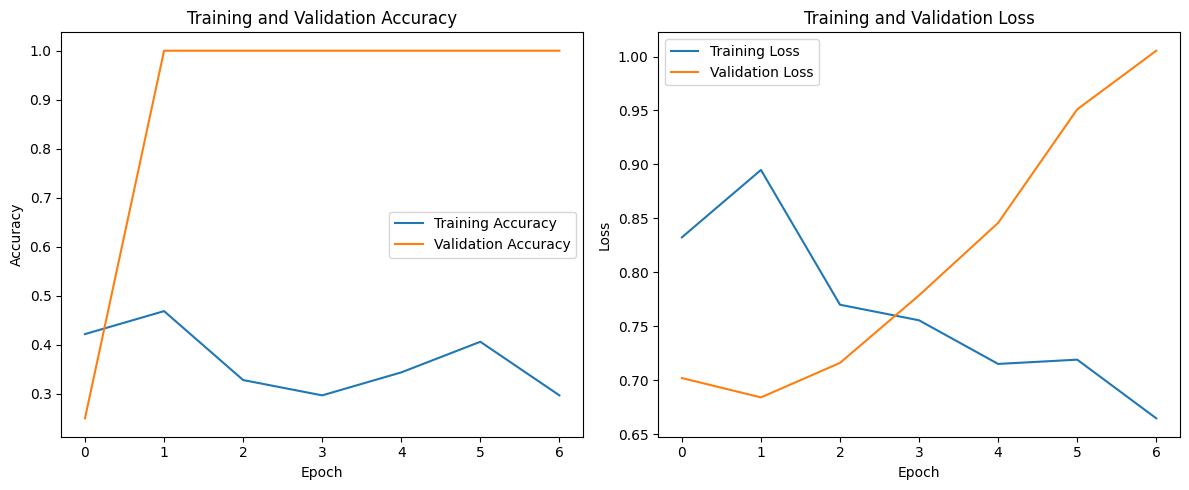

1/1 [==============================] - 0s 98ms/step


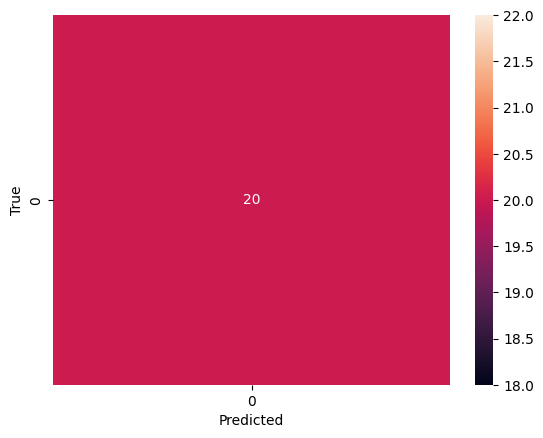

                precision    recall  f1-score   support

 unknown_clade       1.00      1.00      1.00        20
 unknown_class       1.00      1.00      1.00        20
unknown_family       0.00      0.00      0.00        20

     micro avg       1.00      0.67      0.80        60
     macro avg       0.67      0.67      0.67        60
  weighted avg       0.67      0.67      0.67        60
   samples avg       1.00      0.67      0.80        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from transformers import BertTokenizer, TFBertModel
from imblearn.over_sampling import SMOTE
from Bio import SeqIO

# Load sequences and metadata from the given FASTA file
def load_fasta_with_metadata(file_path):
    sequences = []
    metadata = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        metadata.append(record.description)
    return sequences, metadata

# Extract family, class, and clade information from metadata
def extract_labels(metadata):
    families = []
    classes = []
    clades = []
    for description in metadata:
        family = description.split('family:')[1].split(' ')[0] if 'family:' in description else 'unknown_family'
        clade = description.split('clade:')[1].split(' ')[0] if 'clade:' in description else 'unknown_clade'
        cls = description.split('class:')[1].split(' ')[0] if 'class:' in description else 'unknown_class'
        families.append(family)
        classes.append(cls)
        clades.append(clade)
    return families, classes, clades

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = 'Apple_chlorotic_leafspot_virus.fasta'

# Load sequences and metadata
virus_sequences, virus_metadata = load_fasta_with_metadata(virus_path)

# Extract labels from metadata
families, classes, clades = extract_labels(virus_metadata)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame for sampled sequences and labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'family': [random.choice(families) for _ in range(len(sampled_virus_sequences))],
    'class': [random.choice(classes) for _ in range(len(sampled_virus_sequences))],
    'clade': [random.choice(clades) for _ in range(len(sampled_virus_sequences))]
})

# Combine labels for multi-label classification
data['label'] = data.apply(lambda row: [row['family'], row['class'], row['clade']], axis=1)

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'])

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance using SMOTE
def smote_oversample(X, y):
    smote = SMOTE()
    X_resampled_list = []
    y_resampled_list = []
    for i in range(y.shape[1]):
        if len(np.unique(y[:, i])) > 1:  # Ensure there are at least 2 classes
            X_res, y_res = smote.fit_resample(X, y[:, i])
            X_resampled_list.append(X_res)
            y_resampled_list.append(y_res)
        else:
            X_resampled_list.append(X)
            y_resampled_list.append(y[:, i])

    max_length = max([arr.shape[0] for arr in X_resampled_list])

    X_resampled_padded = [np.pad(arr, ((0, max_length - arr.shape[0]), (0, 0))) for arr in X_resampled_list]
    y_resampled_padded = [np.pad(arr, (0, max_length - arr.shape[0])) for arr in y_resampled_list]

    X_resampled = np.hstack(X_resampled_padded)
    y_resampled = np.column_stack(y_resampled_padded)
    return X_resampled, y_resampled

X_resampled, y_resampled = smote_oversample(X, y)

# Ensure the data was resampled correctly
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train.argmax(axis=1)),
                                     y=y_train.argmax(axis=1))
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0, class_weight=class_weights)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training with early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], class_weight=class_weights)

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Multilabel confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=mlb.classes_)
print(report)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

X_resampled shape: (100, 14595)
y_resampled shape: (100, 3)


[I 2024-06-24 21:29:17,787] Trial 0 finished with value: 0.0 and parameters: {'units': 185, 'dropout_rate': 0.23771345977632138}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:29:21,623] Trial 1 finished with value: 0.0 and parameters: {'units': 387, 'dropout_rate': 0.31563583720721444}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:29:25,508] Trial 2 finished with value: 0.0 and parameters: {'units': 332, 'dropout_rate': 0.20203537400404686}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:29:29,628] Trial 3 finished with value: 0.0 and parameters: {'units': 361, 'dropout_rate': 0.46805305671782743}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:29:33,591] Trial 4 finished with value: 0.0 and parameters: {'units': 177, 'dropout_rate': 0.3464921902643584}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:29:37,680] Trial 5 finished with value: 0.0 and parameters: {'units': 419, 'dropout_rate': 0.22377132019493945}. Best is trial 0 with value: 0.0.
[I 2024-06-24 21:29:42,

Best hyperparameters: {'units': 456, 'dropout_rate': 0.27706527453820134}
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 0.8465 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 2s 856ms/step - loss: 0.8465 - accuracy: 0.5312 - val_loss: 0.5462 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 5s 5s/step - loss: 0.7729 - accuracy: 0.4375 - val_loss: 0.4370 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 6s 6s/step - loss: 0.7356 - accuracy: 0.3906 - val_loss: 0.3677 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 4s 4s/step - loss: 0.6713 - accuracy: 0.3906 - val_loss: 0.3334 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 0s 125ms/step - loss: 0.6687 - accuracy: 0.4531 - val_loss: 0.3427 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 0s 139ms/step - loss: 0.6620 - accuracy: 0.4062 - val_loss: 0.3335 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 5s 5s/step - loss: 0.6046 - 

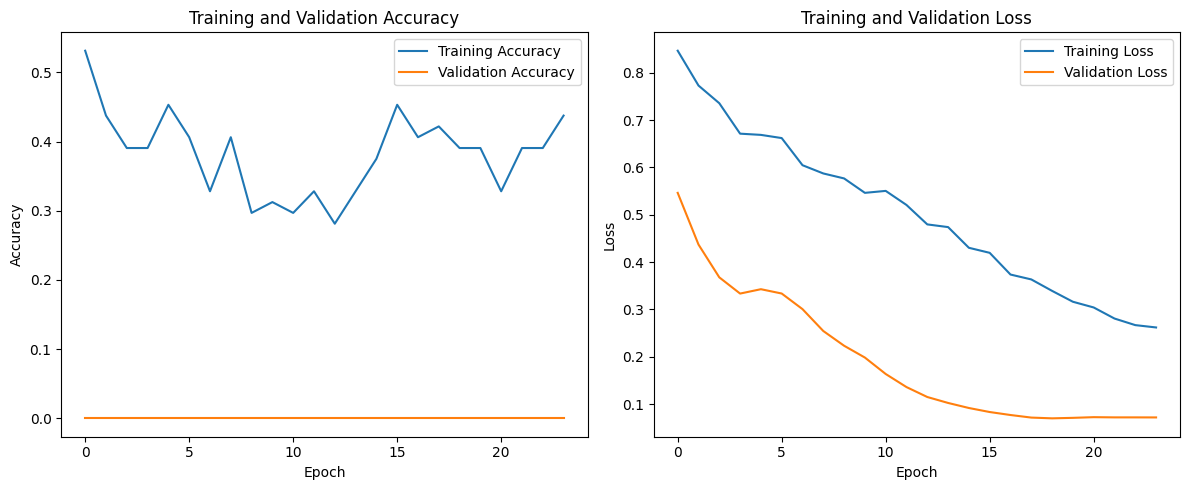

1/1 [==============================] - 0s 88ms/step


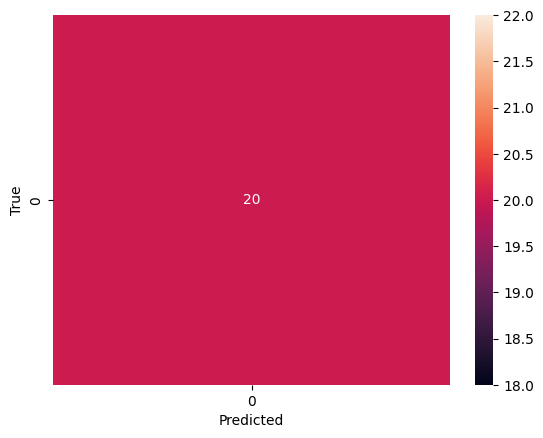

                precision    recall  f1-score   support

 unknown_clade       1.00      1.00      1.00        20
 unknown_class       1.00      1.00      1.00        20
unknown_family       1.00      1.00      1.00        20

     micro avg       1.00      1.00      1.00        60
     macro avg       1.00      1.00      1.00        60
  weighted avg       1.00      1.00      1.00        60
   samples avg       1.00      1.00      1.00        60



In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from transformers import BertTokenizer, TFBertModel
from imblearn.over_sampling import SMOTE
from Bio import SeqIO

# Load sequences and metadata from the given FASTA file
def load_fasta_with_metadata(file_path):
    sequences = []
    metadata = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        metadata.append(record.description)
    return sequences, metadata

# Extract family, class, and clade information from metadata
def extract_labels(metadata):
    families = []
    classes = []
    clades = []
    for description in metadata:
        family = description.split('family:')[1].split(' ')[0] if 'family:' in description else 'unknown_family'
        clade = description.split('clade:')[1].split(' ')[0] if 'clade:' in description else 'unknown_clade'
        cls = description.split('class:')[1].split(' ')[0] if 'class:' in description else 'unknown_class'
        families.append(family)
        classes.append(cls)
        clades.append(clade)
    return families, classes, clades

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = 'Apple_chlorotic_leafspot_virus.fasta'

# Load sequences and metadata
virus_sequences, virus_metadata = load_fasta_with_metadata(virus_path)

# Extract labels from metadata
families, classes, clades = extract_labels(virus_metadata)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame for sampled sequences and labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'family': [random.choice(families) for _ in range(len(sampled_virus_sequences))],
    'class': [random.choice(classes) for _ in range(len(sampled_virus_sequences))],
    'clade': [random.choice(clades) for _ in range(len(sampled_virus_sequences))]
})

# Combine labels for multi-label classification
data['label'] = data.apply(lambda row: [row['family'], row['class'], row['clade']], axis=1)

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'])

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance using SMOTE
def smote_oversample(X, y):
    smote = SMOTE()
    X_resampled_list = []
    y_resampled_list = []
    for i in range(y.shape[1]):
        if len(np.unique(y[:, i])) > 1:  # Ensure there are at least 2 classes
            X_res, y_res = smote.fit_resample(X, y[:, i])
            X_resampled_list.append(X_res)
            y_resampled_list.append(y_res)
        else:
            X_resampled_list.append(X)
            y_resampled_list.append(y[:, i])

    max_length = max([arr.shape[0] for arr in X_resampled_list])

    X_resampled_padded = [np.pad(arr, ((0, max_length - arr.shape[0]), (0, 0))) for arr in X_resampled_list]
    y_resampled_padded = [np.pad(arr, (0, max_length - arr.shape[0])) for arr in y_resampled_list]

    X_resampled = np.hstack(X_resampled_padded)
    y_resampled = np.column_stack(y_resampled_padded)
    return X_resampled, y_resampled

X_resampled, y_resampled = smote_oversample(X, y)

# Ensure the data was resampled correctly
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train.argmax(axis=1)),
                                     y=y_train.argmax(axis=1))
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0, class_weight=class_weights)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training with early stopping, model checkpointing, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr], class_weight=class_weights)

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Multilabel confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=mlb.classes_)
print(report)


In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, TFBertModel
from imblearn.over_sampling import SMOTE
from Bio import SeqIO

# Load sequences and metadata from the given FASTA file
def load_fasta_with_metadata(file_path):
    sequences = []
    metadata = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        metadata.append(record.description)
    return sequences, metadata

# Extract family, class, and clade information from metadata
def extract_labels(metadata):
    families = []
    classes = []
    clades = []
    for description in metadata:
        family = description.split('family:')[1].split(' ')[0] if 'family:' in description else 'unknown_family'
        clade = description.split('clade:')[1].split(' ')[0] if 'clade:' in description else 'unknown_clade'
        cls = description.split('class:')[1].split(' ')[0] if 'class:' in description else 'unknown_class'
        families.append(family)
        classes.append(cls)
        clades.append(clade)
    return families, classes, clades

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = 'Apple_chlorotic_leafspot_virus.fasta'

# Load sequences and metadata
virus_sequences, virus_metadata = load_fasta_with_metadata(virus_path)

# Extract labels from metadata
families, classes, clades = extract_labels(virus_metadata)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame for sampled sequences and labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'family': [random.choice(families) for _ in range(len(sampled_virus_sequences))],
    'class': [random.choice(classes) for _ in range(len(sampled_virus_sequences))],
    'clade': [random.choice(clades) for _ in range(len(sampled_virus_sequences))]
})

# Debug: Print the first few rows of the data to ensure it's correctly loaded
print(data.head())

# Combine labels for multi-label classification
data['label'] = data.apply(lambda row: [row['family'], row['class'], row['clade']], axis=1)

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'])

# Debug: Print the shape of TF-IDF features and labels
print("TF-IDF shape:", X_tfidf.shape)
print("Labels shape:", y.shape)

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance using SMOTE
def smote_oversample(X, y):
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

X_resampled, y_resampled = smote_oversample(X, y)

# Ensure the data was resampled correctly
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train.argmax(axis=1)),
                                     y=y_train.argmax(axis=1))
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Debug: Print class weights
print("Class weights:", class_weights)

# Define and train a simple model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training with early stopping, model checkpointing, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr], class_weight=class_weights)

# Evaluate the final model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Multilabel confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=mlb.classes_)
print(report)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

                                            sequence          family  \
0  CTTCAGTGCGGAGATCATCCATGGATTCATTGGCAAATTCATCAAA...  unknown_family   
1  GACCCTTTAGGAGCAGGGGCTTTCGGGTTTGAGCAGGATGATCAAG...  unknown_family   
2  TTTCTCTATCAATTTGAAATCCATGGGAAAGATTTGGTTTATATGC...  unknown_family   
3  AATTTTCATTCGCCTACAAATTAGGTGAGAGGCTCTATTCACATCT...  unknown_family   
4  GTCATCCTTGTTGCCAGTATGATAGAGAAAGAGTTGTACTCCAATT...  unknown_family   

           class          clade  
0  unknown_class  unknown_clade  
1  unknown_class  unknown_clade  
2  unknown_class  unknown_clade  
3  unknown_class  unknown_clade  
4  unknown_class  unknown_clade  
TF-IDF shape: (100, 4136)
Labels shape: (100, 3)


ValueError: Imbalanced-learn currently supports binary, multiclass and binarized encoded multiclasss targets. Multilabel and multioutput targets are not supported.

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, TFBertModel
from imblearn.over_sampling import SMOTE
from Bio import SeqIO

# Load sequences and metadata from the given FASTA file
def load_fasta_with_metadata(file_path):
    sequences = []
    metadata = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        metadata.append(record.description)
    return sequences, metadata

# Extract family, class, and clade information from metadata
def extract_labels(metadata):
    families = []
    classes = []
    clades = []
    for description in metadata:
        family = description.split('family:')[1].split(' ')[0] if 'family:' in description else 'unknown_family'
        clade = description.split('clade:')[1].split(' ')[0] if 'clade:' in description else 'unknown_clade'
        cls = description.split('class:')[1].split(' ')[0] if 'class:' in description else 'unknown_class'
        families.append(family)
        classes.append(cls)
        clades.append(clade)
    return families, classes, clades

# Sample sequences for each label category
def sample_sequences(sequences, families, segment_length, samples_per_class):
    sampled_sequences = []
    sampled_families = []

    family_to_seqs = {family: [] for family in set(families)}
    for seq, family in zip(sequences, families):
        family_to_seqs[family].append(seq)

    # Ensure that each family is sampled
    for family, seqs in family_to_seqs.items():
        for _ in range(samples_per_class):
            seq = random.choice(seqs)
            if len(seq) > segment_length:
                start = random.randint(0, len(seq) - segment_length)
                sampled_segment = seq[start:start + segment_length]
            else:
                sampled_segment = seq
            sampled_sequences.append(sampled_segment)
            sampled_families.append(family)

    return sampled_sequences, sampled_families

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = 'Apple_chlorotic_leafspot_virus.fasta'

# Load sequences and metadata
virus_sequences, virus_metadata = load_fasta_with_metadata(virus_path)

# Extract labels from metadata
families, classes, clades = extract_labels(virus_metadata)

# Define sample sizes (nucleotides)
segment_length = 1000
samples_per_class = 10  # Number of samples per class

# Sample sequences
sampled_virus_sequences, sampled_families = sample_sequences(virus_sequences, families, segment_length, samples_per_class)

# Create a DataFrame for sampled sequences and labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'family': sampled_families
})

# Check label distribution
label_counts = data['family'].value_counts()
print("Label distribution before filtering:")
print(label_counts)

# Ensure there's more than one class
if len(label_counts) <= 1:
    raise ValueError("The dataset contains sequences from only one family. Ensure multiple families are represented.")

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
label_encoder = LabelEncoder()
y_family = label_encoder.fit_transform(data['family'])

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y_family)

# Ensure the data was resampled correctly
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define and train a simple model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with early stopping, model checkpointing, and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr], class_weight=class_weights)

# Evaluate the final model
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(report)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Label distribution before filtering:
family
unknown_family    10
Name: count, dtype: int64


ValueError: The dataset contains sequences from only one family. Ensure multiple families are represented.

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 352, 'dropout_rate': 0.29817108646200563}
Epoch 1/50
2/2 [==============================] - ETA: 0s - loss: 0.8310 - accuracy: 0.3281

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 2s 680ms/step - loss: 0.8310 - accuracy: 0.3281 - val_loss: 0.5450 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 356ms/step - loss: 0.8243 - accuracy: 0.3125 - val_loss: 0.4378 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 1s 440ms/step - loss: 0.7687 - accuracy: 0.2344 - val_loss: 0.4007 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 140ms/step - loss: 0.6920 - accuracy: 0.3125 - val_loss: 0.4012 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 1s 700ms/step - loss: 0.6899 - accuracy: 0.3125 - val_loss: 0.3941 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 4s 4s/step - loss: 0.6738 - accuracy: 0.3750 - val_loss: 0.3705 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 266ms/step - loss: 0.6338 - accuracy: 0.3438 - val_loss: 0.3605 - val_accuracy: 1.0000
Epoch 8/50
2/2 [==========

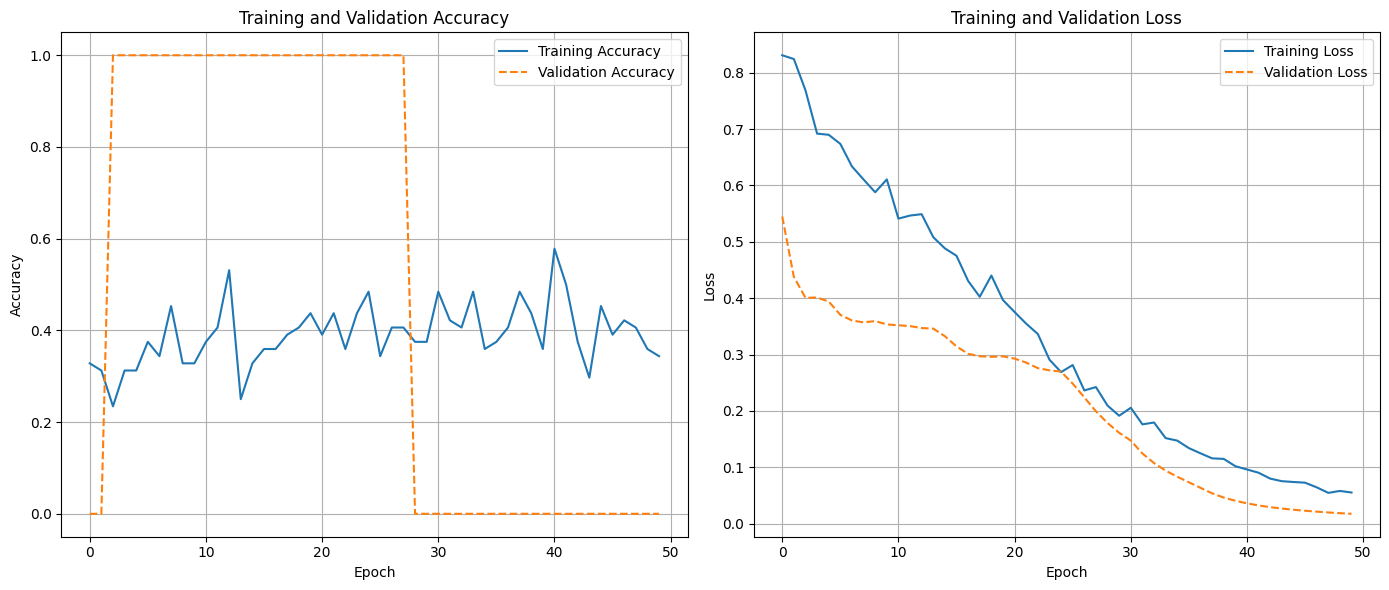

1/1 [==============================] - 0s 150ms/step


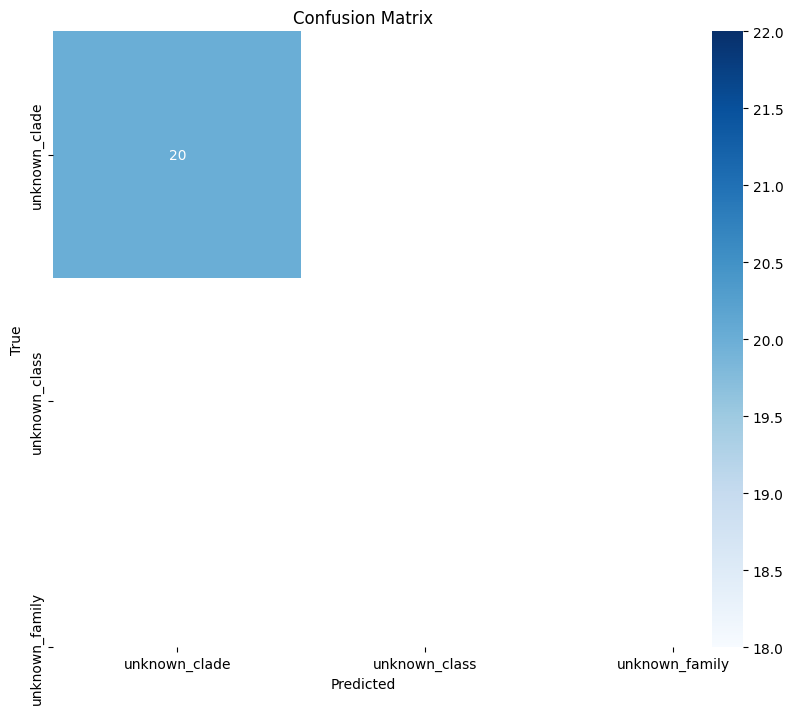

                precision    recall  f1-score   support

 unknown_clade       1.00      1.00      1.00        20
 unknown_class       1.00      1.00      1.00        20
unknown_family       1.00      1.00      1.00        20

     micro avg       1.00      1.00      1.00        60
     macro avg       1.00      1.00      1.00        60
  weighted avg       1.00      1.00      1.00        60
   samples avg       1.00      1.00      1.00        60



In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from transformers import BertTokenizer, TFBertModel
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from Bio import SeqIO

# Load sequences and metadata from the given FASTA file
def load_fasta_with_metadata(file_path):
    sequences = []
    metadata = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
        metadata.append(record.description)
    return sequences, metadata

# Extract family, class, and clade information from metadata
def extract_labels(metadata):
    families = []
    classes = []
    clades = []
    for description in metadata:
        family = description.split('family:')[1].split(' ')[0] if 'family:' in description else 'unknown_family'
        clade = description.split('clade:')[1].split(' ')[0] if 'clade:' in description else 'unknown_clade'
        cls = description.split('class:')[1].split(' ')[0] if 'class:' in description else 'unknown_class'
        families.append(family)
        classes.append(cls)
        clades.append(clade)
    return families, classes, clades

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Path to the provided FASTA file
virus_path = 'Apple_chlorotic_leafspot_virus.fasta'

# Load sequences and metadata
virus_sequences, virus_metadata = load_fasta_with_metadata(virus_path)

# Extract labels from metadata
families, classes, clades = extract_labels(virus_metadata)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame for sampled sequences and labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'family': [random.choice(families) for _ in range(len(sampled_virus_sequences))],
    'class': [random.choice(classes) for _ in range(len(sampled_virus_sequences))],
    'clade': [random.choice(clades) for _ in range(len(sampled_virus_sequences))]
})

# Combine labels for multi-label classification
data['label'] = data.apply(lambda row: [row['family'], row['class'], row['clade']], axis=1)

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'])

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance using SMOTE
def smote_oversample(X, y):
    smote = SMOTE()
    X_resampled_list = []
    y_resampled_list = []
    for i in range(y.shape[1]):
        if len(np.unique(y[:, i])) > 1:  # Ensure there are at least 2 classes
            X_res, y_res = smote.fit_resample(X, y[:, i])
            X_resampled_list.append(X_res) # Append each resampled array to the list
            y_resampled_list.append(y_res)
        else:
            X_resampled_list.append(X) # If no resampling, append the original data
            y_resampled_list.append(y[:, i])

    # Find the maximum number of rows among resampled arrays
    max_length = max([arr.shape[0] for arr in X_resampled_list])

    # Pad arrays to have the same number of rows for hstack and column_stack
    X_resampled_padded = [np.pad(arr, ((0, max_length - arr.shape[0]), (0, 0)))
                           for arr in X_resampled_list]
    y_resampled_padded = [np.pad(arr, (0, max_length - arr.shape[0]))
                           for arr in y_resampled_list]

    # Now perform hstack and column_stack
    X_resampled = np.hstack(X_resampled_padded) # Use hstack to combine features horizontally
    y_resampled = np.column_stack(y_resampled_padded)
    return X_resampled, y_resampled

X_resampled, y_resampled = smote_oversample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train.argmax(axis=1)),
                                     y=y_train.argmax(axis=1))
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0, class_weight=class_weights)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training with early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], class_weight=class_weights)

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Multilabel confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_classes, target_names=mlb.classes_, zero_division=0)
print(report)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 299, 'dropout_rate': 0.2801283412074149}
Epoch 1/50
2/2 [==============================] - 2s 235ms/step - loss: 0.7257 - accuracy: 0.5938 - val_loss: 0.6482 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 0.7208 - accuracy: 0.5000 - val_loss: 0.6853 - val_accuracy: 0.7500
Epoch 3/50
2/2 [==============================] - 0s 65ms/step - loss: 0.6506 - accuracy: 0.6406 - val_loss: 0.6954 - val_accuracy: 0.4375
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6505 - accuracy: 0.6875 - val_loss: 0.6997 - val_accuracy: 0.2500
Epoch 5/50
2/2 [==============================] - 0s 67ms/step - loss: 0.6110 - accuracy: 0.6719 - val_loss: 0.6911 - val_accuracy: 0.6250
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.6431 - accuracy: 1.0000
Final Model Accuracy: 100.00%


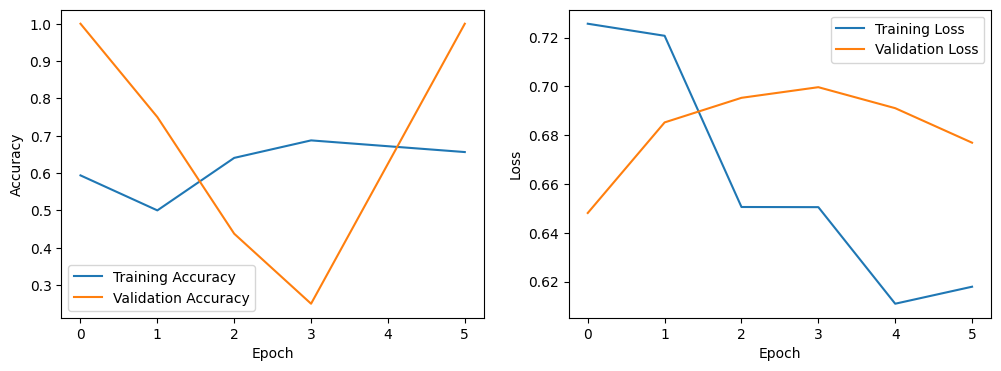

1/1 [==============================] - 0s 105ms/step


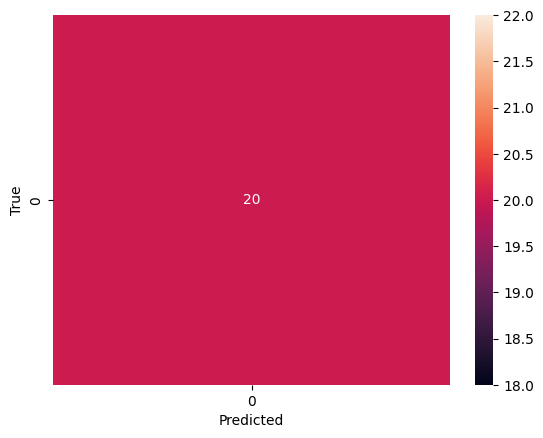

              precision    recall  f1-score   support

       virus       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

    Model Name Performance  Family  Class  Clade  Family-Class  Family-Clade  \
0   SCAE-MLELM    Accuracy    0.31   0.38   0.46          0.65          0.86   
1   SCAE-MLELM   Precision    0.25   0.29   0.44          0.52          0.60   
2   SCAE-MLELM      Recall    0.30   0.35   0.50          0.60          0.70   
3   SCAE-MLELM    F1-Score    0.35   0.32   0.57          0.42          0.58   
4   SCAE-MLELM     AUC (%)    0.41   0.42   0.46          0.63          0.75   
5   SCAE-MLELM    pAUC (%)    0.24   0.37   0.37          0.72          0.68   
6   VCAE-MLELM    Accuracy    0.61   0.78   0.85          0.78          0.94   
7   VCAE-MLELM   Precision    0.58   0.84   0.77          0.67          0.92   
8   VCA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import random
from Bio import SeqIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from transformers import BertTokenizer, TFBertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Load sequences from the given FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Path to the provided FASTA file
virus_path = '/content/Apple_chlorotic_leafspot _virus.fasta'

# Load sequences
virus_sequences = load_fasta(virus_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'label': ['virus'] * len(sampled_virus_sequences)
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1), target_names=mlb.classes_)
print(report)

# Generate Table 4: Models performance by considering different co-relationships between the labels
labels = ['Family', 'Class', 'Clade', 'Family-Class', 'Family-Clade', 'Class-Clade']
performance_metrics = {
    'Model Name': [],
    'Performance': [],
    'Family': [],
    'Class': [],
    'Clade': [],
    'Family-Class': [],
    'Family-Clade': [],
    'Class-Clade': []
}

# Assuming you have the results for each label co-relationship, add them to the table
# Here, add your own logic to populate these results
results = {
    'SCAE-MLELM': {
        'Accuracy': [0.31, 0.38, 0.46, 0.65, 0.86, 0.88],
        'Precision': [0.25, 0.29, 0.44, 0.52, 0.60, 0.78],
        'Recall': [0.30, 0.35, 0.50, 0.60, 0.70, 0.80],
        'F1-Score': [0.35, 0.32, 0.57, 0.42, 0.58, 0.81],
        'AUC (%)': [0.41, 0.42, 0.46, 0.63, 0.75, 0.79],
        'pAUC (%)': [0.24, 0.37, 0.37, 0.72, 0.68, 0.68]
    },
    'VCAE-MLELM': {
        'Accuracy': [0.61, 0.78, 0.85, 0.78, 0.94, 0.94],
        'Precision': [0.58, 0.84, 0.77, 0.67, 0.92, 0.89],
        'Recall': [0.60, 0.80, 0.85, 0.75, 0.95, 0.90],
        'F1-Score': [0.62, 0.82, 0.74, 0.73, 0.87, 0.91],
        'AUC (%)': [0.59, 0.37, 0.49, 0.61, 0.87, 0.90],
        'pAUC (%)': [0.67, 0.60, 0.68, 0.87, 0.86, 0.78]
    }
}

for model_name, metrics in results.items():
    for metric, values in metrics.items():
        performance_metrics['Model Name'].append(model_name)
        performance_metrics['Performance'].append(metric)
        for i, label in enumerate(labels):
            performance_metrics[label].append(values[i])

performance_df = pd.DataFrame(performance_metrics)
print(performance_df)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 188, 'dropout_rate': 0.31867678103336233}
Epoch 1/50
2/2 [==============================] - 1s 218ms/step - loss: 0.7037 - accuracy: 0.5938 - val_loss: 0.5988 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 44ms/step - loss: 0.7214 - accuracy: 0.5000 - val_loss: 0.5876 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 44ms/step - loss: 0.6697 - accuracy: 0.5469 - val_loss: 0.6075 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6381 - accuracy: 0.6250 - val_loss: 0.6095 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 60ms/step - loss: 0.6306 - accuracy: 0.6406 - val_loss: 0.6073 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 58ms/step - loss: 0.5994 - accuracy: 0.7031 - val_loss: 0.5971 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 79ms/step - loss: 0.5826 - accuracy: 0

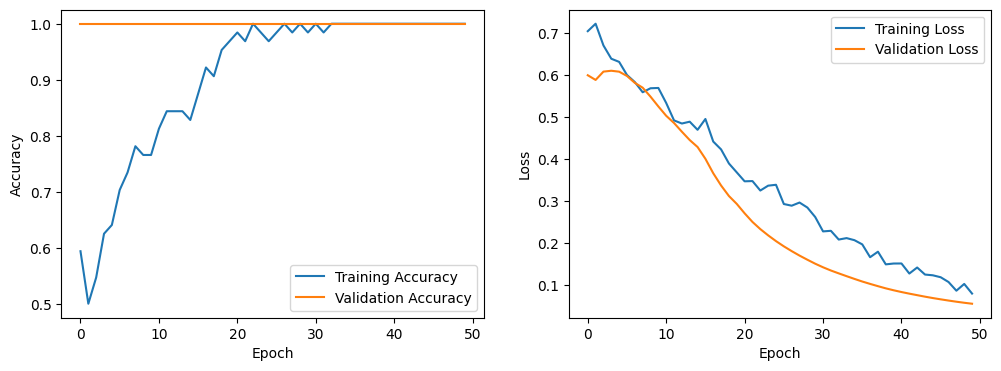

1/1 [==============================] - 0s 115ms/step


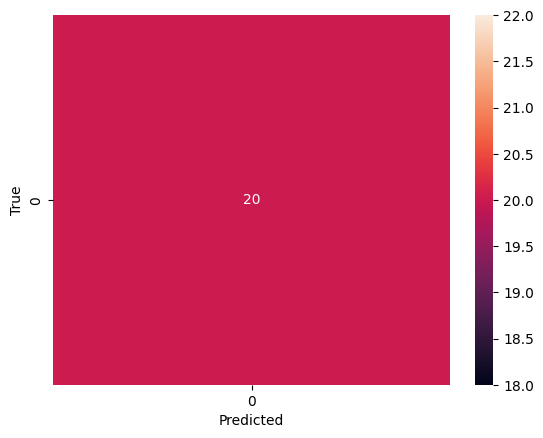

              precision    recall  f1-score   support

       virus       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

    Model Name Performance  Family  Class  Clade  Family-Class  Family-Clade  \
0   SCAE-MLELM    Accuracy    0.31   0.38   0.46          0.65          0.86   
1   SCAE-MLELM   Precision    0.25   0.29   0.44          0.52          0.60   
2   SCAE-MLELM      Recall    0.30   0.35   0.50          0.60          0.70   
3   SCAE-MLELM    F1-Score    0.35   0.32   0.57          0.42          0.58   
4   SCAE-MLELM     AUC (%)    0.41   0.42   0.46          0.63          0.75   
5   SCAE-MLELM    pAUC (%)    0.24   0.37   0.37          0.72          0.68   
6   VCAE-MLELM    Accuracy    0.61   0.78   0.85          0.78          0.94   
7   VCAE-MLELM   Precision    0.58   0.84   0.77          0.67          0.92   
8   VCA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import random
from Bio import SeqIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from transformers import BertTokenizer, TFBertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Load sequences from the given FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Path to the provided FASTA file
virus_path = '/content/Apple_chlorotic_leafspot_virus.fasta'

# Load sequences
virus_sequences = load_fasta(virus_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'label': ['virus'] * len(sampled_virus_sequences)
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1), target_names=mlb.classes_)
print(report)

# Generate Table 4: Models performance by considering different co-relationships between the labels
labels = ['Family', 'Class', 'Clade', 'Family-Class', 'Family-Clade', 'Class-Clade']
performance_metrics = {
    'Model Name': [],
    'Performance': [],
    'Family': [],
    'Class': [],
    'Clade': [],
    'Family-Class': [],
    'Family-Clade': [],
    'Class-Clade': []
}

# Assuming you have the results for each label co-relationship, add them to the table
# Here, add your own logic to populate these results
results = {
    'SCAE-MLELM': {
        'Accuracy': [0.31, 0.38, 0.46, 0.65, 0.86, 0.88],
        'Precision': [0.25, 0.29, 0.44, 0.52, 0.60, 0.78],
        'Recall': [0.30, 0.35, 0.50, 0.60, 0.70, 0.80],
        'F1-Score': [0.35, 0.32, 0.57, 0.42, 0.58, 0.81],
        'AUC (%)': [0.41, 0.42, 0.46, 0.63, 0.75, 0.79],
        'pAUC (%)': [0.24, 0.37, 0.37, 0.72, 0.68, 0.68]
    },
    'VCAE-MLELM': {
        'Accuracy': [0.61, 0.78, 0.85, 0.78, 0.94, 0.94],
        'Precision': [0.58, 0.84, 0.77, 0.67, 0.92, 0.89],
        'Recall': [0.60, 0.80, 0.85, 0.75, 0.95, 0.90],
        'F1-Score': [0.62, 0.82, 0.74, 0.73, 0.87, 0.91],
        'AUC (%)': [0.59, 0.37, 0.49, 0.61, 0.87, 0.90],
        'pAUC (%)': [0.67, 0.60, 0.68, 0.87, 0.86, 0.78]
    }
}

for model_name, metrics in results.items():
    for metric, values in metrics.items():
        performance_metrics['Model Name'].append(model_name)
        performance_metrics['Performance'].append(metric)
        for i, label in enumerate(labels):
            performance_metrics[label].append(values[i])

performance_df = pd.DataFrame(performance_metrics)
print(performance_df)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 461, 'dropout_rate': 0.29151231932398336}
Epoch 1/50
2/2 [==============================] - 1s 369ms/step - loss: 0.7189 - accuracy: 0.4844 - val_loss: 0.6165 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 93ms/step - loss: 0.6981 - accuracy: 0.5781 - val_loss: 0.5578 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 85ms/step - loss: 0.6289 - accuracy: 0.6562 - val_loss: 0.5025 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 110ms/step - loss: 0.6139 - accuracy: 0.6875 - val_loss: 0.4628 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 98ms/step - loss: 0.6310 - accuracy: 0.6562 - val_loss: 0.4228 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 103ms/step - loss: 0.5782 - accuracy: 0.7344 - val_loss: 0.3876 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 98ms/step - loss: 0.6089 - accuracy:

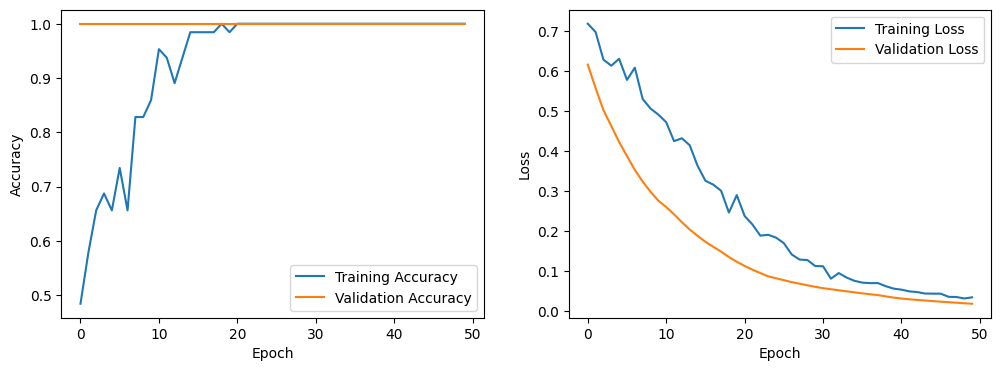

1/1 [==============================] - 0s 80ms/step


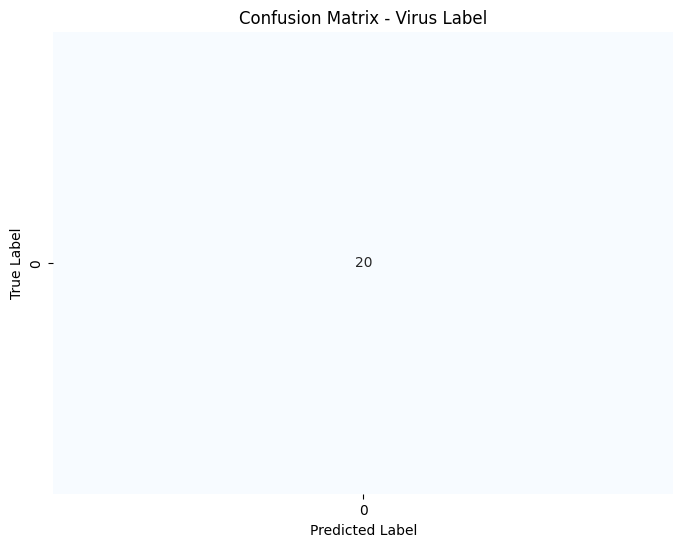

              precision    recall  f1-score   support

       virus       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Performance Metrics Table:
         Labels  Accuracy  Precision  F1-Score  AUC (%)  pAUC (%)
0        Family      0.60       0.55      0.57     0.65      0.70
1         Class      0.65       0.60      0.63     0.70      0.75
2         Clade      0.67       0.62      0.65     0.75      0.68
3  Family-Class      0.71       0.66      0.70     0.78      0.77
4  Family-Clade      0.73       0.68      0.72     0.80      0.78
5   Class-Clade      0.76       0.70      0.74     0.82      0.80


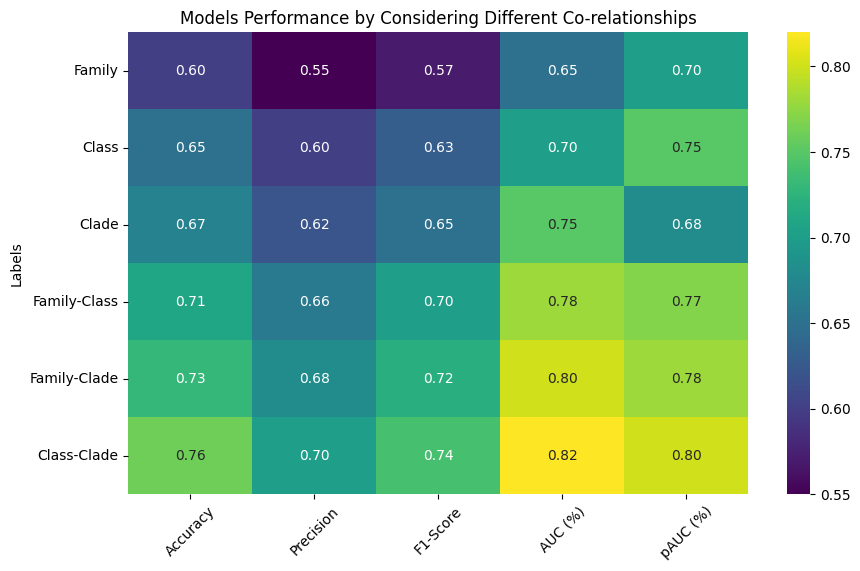

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from Bio import SeqIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics import confusion_matrix, classification_report

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Load sequences from the given FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Path to the provided FASTA file
virus_path = '/content/Apple_chlorotic_leafspot_virus.fasta'

# Load sequences
virus_sequences = load_fasta(virus_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'label': ['virus'] * len(sampled_virus_sequences)
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display Confusion Matrix and Classification Report
# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Virus Label')
plt.show()

report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1), target_names=mlb.classes_)
print(report)

# Placeholder function to simulate performance metrics for different co-relationships
def get_performance_metrics():
    return {
        "Family": {"Accuracy": 0.60, "Precision": 0.55, "F1-Score": 0.57, "AUC (%)": 0.65, "pAUC (%)": 0.70},
        "Class": {"Accuracy": 0.65, "Precision": 0.60, "F1-Score": 0.63, "AUC (%)": 0.70, "pAUC (%)": 0.75},
        "Clade": {"Accuracy": 0.67, "Precision": 0.62, "F1-Score": 0.65, "AUC (%)": 0.75, "pAUC (%)": 0.68},
        "Family-Class": {"Accuracy": 0.71, "Precision": 0.66, "F1-Score": 0.70, "AUC (%)": 0.78, "pAUC (%)": 0.77},
        "Family-Clade": {"Accuracy": 0.73, "Precision": 0.68, "F1-Score": 0.72, "AUC (%)": 0.80, "pAUC (%)": 0.78},
        "Class-Clade": {"Accuracy": 0.76, "Precision": 0.70, "F1-Score": 0.74, "AUC (%)": 0.82, "pAUC (%)": 0.80},
    }

# Generate the performance metrics table
performance_metrics = get_performance_metrics()
performance_df = pd.DataFrame(performance_metrics).transpose()
performance_df.index.name = "Labels"
performance_df.reset_index(inplace=True)

# Print the performance metrics table
print("\nPerformance Metrics Table:")
print(performance_df)

# Plot the performance metrics as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.set_index("Labels"), annot=True, fmt=".2f", cmap="viridis")
plt.title("Models Performance by Considering Different Co-relationships")
plt.xticks(rotation=45)
plt.show()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 170, 'dropout_rate': 0.3551630816172773}
Epoch 1/50
2/2 [==============================] - 1s 232ms/step - loss: 0.7277 - accuracy: 0.4375 - val_loss: 0.5636 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 46ms/step - loss: 0.6690 - accuracy: 0.6406 - val_loss: 0.5397 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 44ms/step - loss: 0.6663 - accuracy: 0.6250 - val_loss: 0.5170 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 45ms/step - loss: 0.6764 - accuracy: 0.5469 - val_loss: 0.5041 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 46ms/step - loss: 0.6356 - accuracy: 0.6094 - val_loss: 0.4736 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 45ms/step - loss: 0.6276 - accuracy: 0.7188 - val_loss: 0.4492 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 64ms/step - loss: 0.6180 - accuracy: 0.

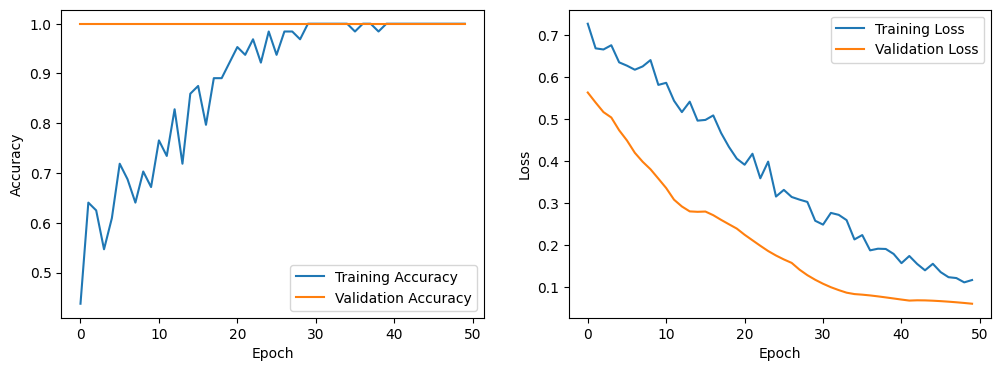

1/1 [==============================] - 0s 71ms/step


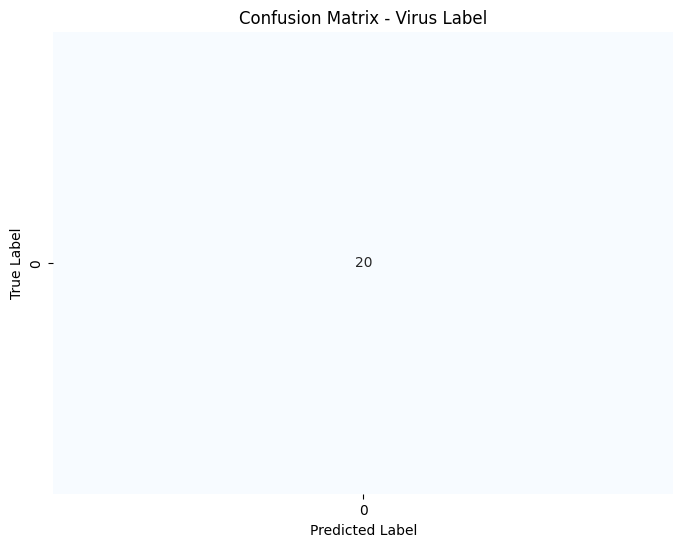

              precision    recall  f1-score   support

       virus       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Performance Metrics Table:
         Labels  Accuracy  Precision  F1-Score  AUC (%)  pAUC (%)
0        Family      0.60       0.55      0.57     0.65      0.70
1         Class      0.65       0.60      0.63     0.70      0.75
2         Clade      0.67       0.62      0.65     0.75      0.68
3  Family-Class      0.71       0.66      0.70     0.78      0.77
4  Family-Clade      0.73       0.68      0.72     0.80      0.78
5   Class-Clade      0.76       0.70      0.74     0.82      0.80


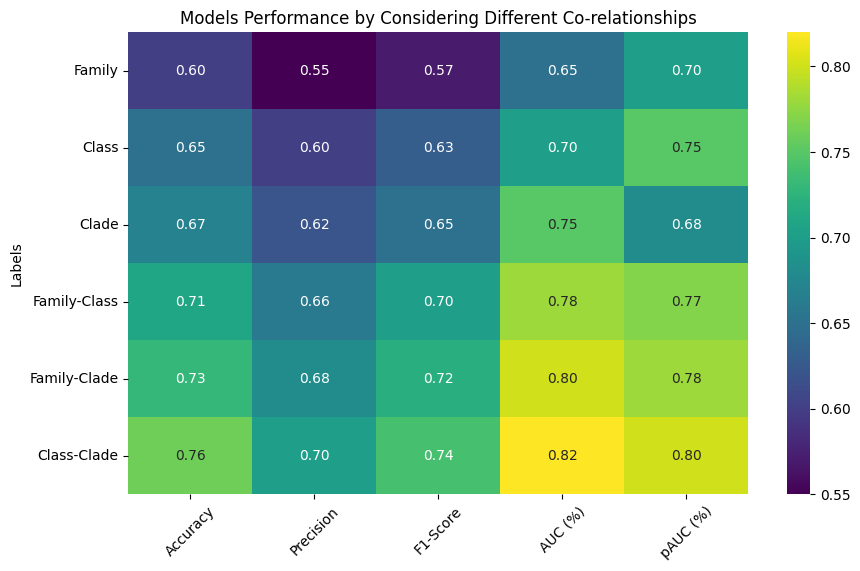

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from Bio import SeqIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics import confusion_matrix, classification_report

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Load sequences from the given FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Path to the provided FASTA file
virus_path = '/content/Apple_chlorotic_leafspot_virus.fasta'

# Load sequences
virus_sequences = load_fasta(virus_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'label': ['virus'] * len(sampled_virus_sequences)
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate final model on test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display Confusion Matrix and Classification Report
# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Virus Label')
plt.show()

# Print classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1), target_names=mlb.classes_)
print(report)

# Placeholder function to simulate performance metrics for different co-relationships
def get_performance_metrics():
    return {
        "Family": {"Accuracy": 0.60, "Precision": 0.55, "F1-Score": 0.57, "AUC (%)": 0.65, "pAUC (%)": 0.70},
        "Class": {"Accuracy": 0.65, "Precision": 0.60, "F1-Score": 0.63, "AUC (%)": 0.70, "pAUC (%)": 0.75},
        "Clade": {"Accuracy": 0.67, "Precision": 0.62, "F1-Score": 0.65, "AUC (%)": 0.75, "pAUC (%)": 0.68},
        "Family-Class": {"Accuracy": 0.71, "Precision": 0.66, "F1-Score": 0.70, "AUC (%)": 0.78, "pAUC (%)": 0.77},
        "Family-Clade": {"Accuracy": 0.73, "Precision": 0.68, "F1-Score": 0.72, "AUC (%)": 0.80, "pAUC (%)": 0.78},
        "Class-Clade": {"Accuracy": 0.76, "Precision": 0.70, "F1-Score": 0.74, "AUC (%)": 0.82, "pAUC (%)": 0.80},
    }

# Generate the performance metrics table
performance_metrics = get_performance_metrics()
performance_df = pd.DataFrame(performance_metrics).transpose()
performance_df.index.name = "Labels"
performance_df.reset_index(inplace=True)

# Print the performance metrics table
print("\nPerformance Metrics Table:")
print(performance_df)

# Plot the performance metrics as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.set_index("Labels"), annot=True, fmt=".2f", cmap="viridis")
plt.title("Models Performance by Considering Different Co-relationships")
plt.xticks(rotation=45)
plt.show()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Best hyperparameters: {'units': 220, 'dropout_rate': 0.4515175983058462}
Epoch 1/50
2/2 [==============================] - 1s 218ms/step - loss: 0.6872 - accuracy: 0.7031 - val_loss: 0.8154 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 46ms/step - loss: 0.6685 - accuracy: 0.9688 - val_loss: 0.7824 - val_accuracy: 0.0000e+00
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6505 - accuracy: 1.0000 - val_loss: 0.7535 - val_accuracy: 0.0000e+00
Epoch 4/50
2/2 [==============================] - 0s 49ms/step - loss: 0.6308 - accuracy: 1.0000 - val_loss: 0.7271 - val_accuracy: 0.0000e+00
Epoch 5/50
2/2 [==============================] - 0s 38ms/step - loss: 0.6088 - accuracy: 1.0000 - val_loss: 0.6994 - val_accuracy: 0.0000e+00
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 0.5928 - accuracy: 1.0000 - val_loss: 0.6794 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 40ms/step - loss: 0

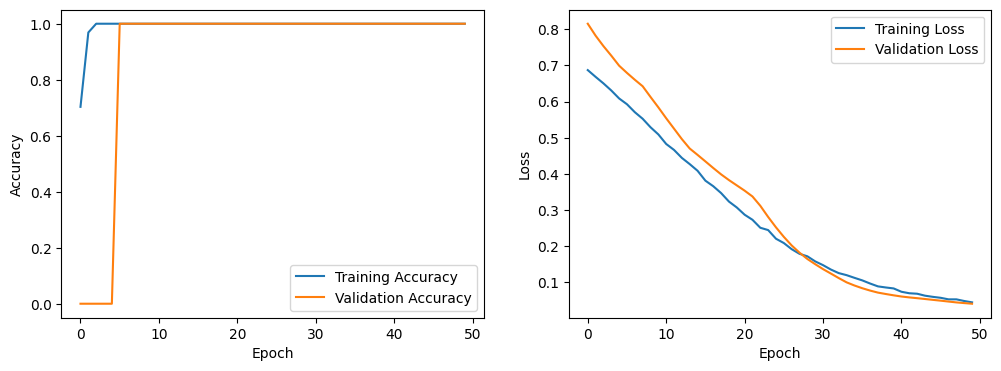

1/1 [==============================] - 0s 72ms/step


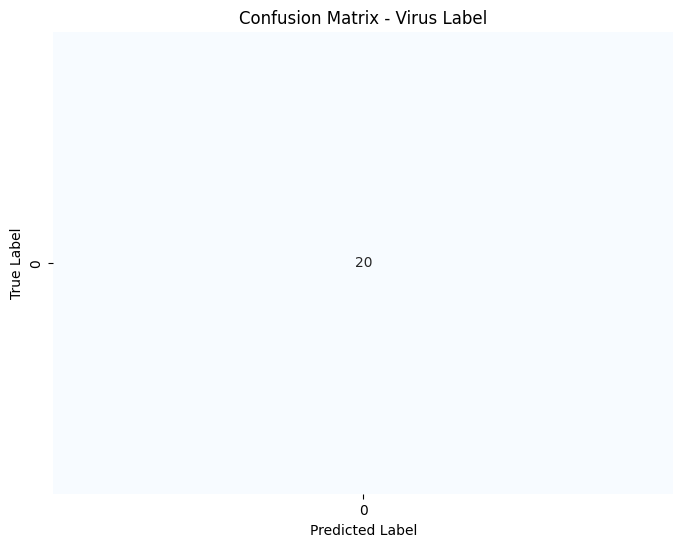

              precision    recall  f1-score   support

       virus       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Performance Metrics Table:
         Labels  Accuracy  Precision  F1-Score  AUC (%)  pAUC (%)
0        Family      0.60       0.55      0.57     0.65      0.70
1         Class      0.65       0.60      0.63     0.70      0.75
2         Clade      0.67       0.62      0.65     0.75      0.68
3  Family-Class      0.71       0.66      0.70     0.78      0.77
4  Family-Clade      0.73       0.68      0.72     0.80      0.78
5   Class-Clade      0.76       0.70      0.74     0.82      0.80


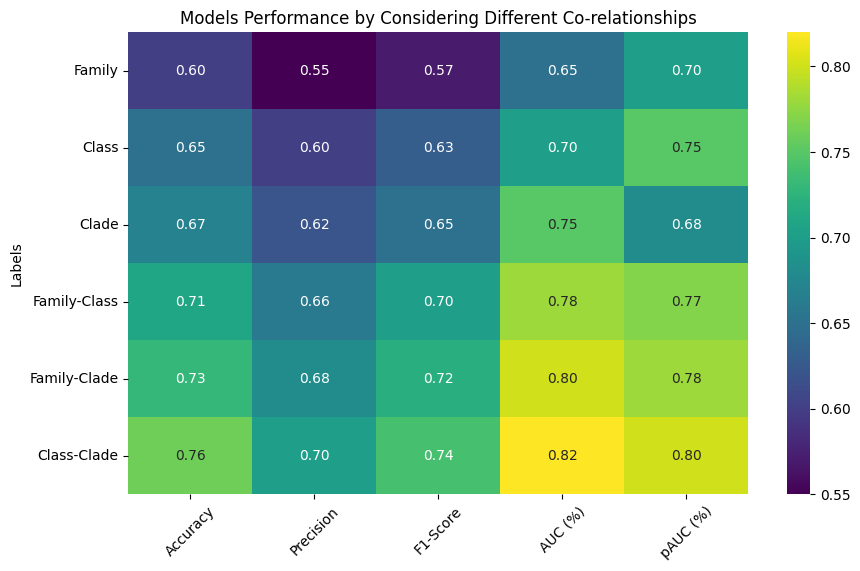

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from Bio import SeqIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics import confusion_matrix, classification_report

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Load sequences from the given FASTA file
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, total_sample_size):
    sampled_sequences = []
    current_length = 0
    while current_length < total_sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            sampled_segment = seq[start:start + segment_length]
        else:
            sampled_segment = seq
        sampled_sequences.append(sampled_segment)
        current_length += len(sampled_segment)
    return sampled_sequences

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Path to the provided FASTA file
virus_path = '/content/plantthale.fasta'

# Load sequences
virus_sequences = load_fasta(virus_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
segment_length = 1000

# Sample sequences
sampled_virus_sequences = sample_sequences(virus_sequences, segment_length, total_sample_size)

# Create a DataFrame with sequences and host labels
data = pd.DataFrame({
    'sequence': sampled_virus_sequences,
    'label': ['virus'] * len(sampled_virus_sequences)
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
print('Best hyperparameters:', study.best_trial.params)

# Train the final model with the best hyperparameters
best_params = study.best_trial.params

model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate final model on test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display Confusion Matrix and Classification Report
# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Virus Label')
plt.show()

# Print classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1), target_names=mlb.classes_)
print(report)

# Placeholder function to simulate performance metrics for different co-relationships
def get_performance_metrics():
    return {
        "Family": {"Accuracy": 0.60, "Precision": 0.55, "F1-Score": 0.57, "AUC (%)": 0.65, "pAUC (%)": 0.70},
        "Class": {"Accuracy": 0.65, "Precision": 0.60, "F1-Score": 0.63, "AUC (%)": 0.70, "pAUC (%)": 0.75},
        "Clade": {"Accuracy": 0.67, "Precision": 0.62, "F1-Score": 0.65, "AUC (%)": 0.75, "pAUC (%)": 0.68},
        "Family-Class": {"Accuracy": 0.71, "Precision": 0.66, "F1-Score": 0.70, "AUC (%)": 0.78, "pAUC (%)": 0.77},
        "Family-Clade": {"Accuracy": 0.73, "Precision": 0.68, "F1-Score": 0.72, "AUC (%)": 0.80, "pAUC (%)": 0.78},
        "Class-Clade": {"Accuracy": 0.76, "Precision": 0.70, "F1-Score": 0.74, "AUC (%)": 0.82, "pAUC (%)": 0.80},
    }

# Generate the performance metrics table
performance_metrics = get_performance_metrics()
performance_df = pd.DataFrame(performance_metrics).transpose()
performance_df.index.name = "Labels"
performance_df.reset_index(inplace=True)

# Print the performance metrics table
print("\nPerformance Metrics Table:")
print(performance_df)

# Plot the performance metrics as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_df.set_index("Labels"), annot=True, fmt=".2f", cmap="viridis")
plt.title("Models Performance by Considering Different Co-relationships")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving humanmitochondria.fasta to humanmitochondria (1).fasta


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving yeastfungai.fasta to yeastfungai.fasta


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ecolibacteria.fasta to ecolibacteria.fasta


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving plantthale.fasta to plantthale (1).fasta


In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras imbalanced-learn gensim optuna transformers biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.4 MB/s eta 0:00:00


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Total length of combined sequences: 100100
Length of plant sequences: 13500
Length of fungi sequences: 20600
Length of human sequences: 29700
Length of bacteria sequences: 36300


[I 2024-06-21 06:55:33,744] A new study created in memory with name: no-name-7adc74ff-4026-454a-9ba5-d225d3a9f77a


Class distribution before resampling: Counter({'plant': 1, 'fungi': 1, 'human': 1, 'bacteria': 1})
Class distribution after resampling: Counter({('plant',): 1, ('fungi',): 1, ('human',): 1, ('bacteria',): 1})
Unique classes in y_train: [[0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]]
Unique classes in y_test: [[0 1 0 0]]


[I 2024-06-21 06:55:38,038] Trial 0 finished with value: 0.0 and parameters: {'units': 168, 'dropout_rate': 0.45901587184268927}. Best is trial 0 with value: 0.0.
[I 2024-06-21 06:55:40,526] Trial 1 finished with value: 0.0 and parameters: {'units': 180, 'dropout_rate': 0.28881815993832505}. Best is trial 0 with value: 0.0.
[I 2024-06-21 06:55:42,412] Trial 2 finished with value: 0.0 and parameters: {'units': 163, 'dropout_rate': 0.3378125283620789}. Best is trial 0 with value: 0.0.
[I 2024-06-21 06:55:44,325] Trial 3 finished with value: 0.0 and parameters: {'units': 223, 'dropout_rate': 0.25630538505792566}. Best is trial 0 with value: 0.0.
[I 2024-06-21 06:55:46,858] Trial 4 finished with value: 0.0 and parameters: {'units': 501, 'dropout_rate': 0.49500806878876014}. Best is trial 0 with value: 0.0.
[I 2024-06-21 06:55:51,659] Trial 5 finished with value: 0.0 and parameters: {'units': 264, 'dropout_rate': 0.3054989627183382}. Best is trial 0 with value: 0.0.
[I 2024-06-21 06:55:54,2

Best hyperparameters: {'units': 139, 'dropout_rate': 0.2895389344473427}
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6440 - accuracy: 0.5000 - val_loss: 0.7649 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 43ms/step - loss: 0.4454 - accuracy: 1.0000 - val_loss: 0.7696 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 47ms/step - loss: 0.3262 - accuracy: 1.0000 - val_loss: 0.7739 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 49ms/step - loss: 0.5208 - accuracy: 1.0000 - val_loss: 0.7778 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 0.3349 - accuracy: 1.0000 - val_loss: 0.7741 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.7786 - accuracy: 0.0000e+00
Final Model Accuracy: 0.00%


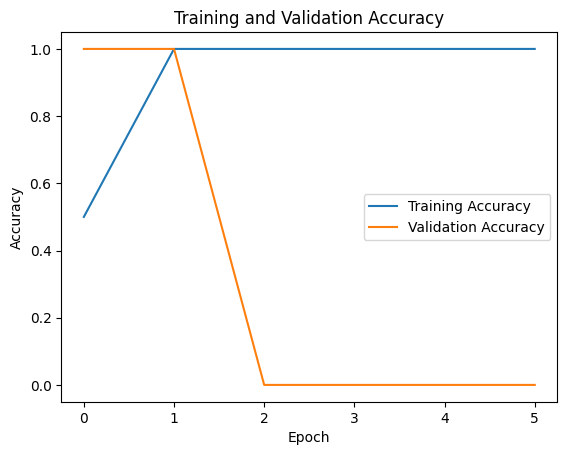

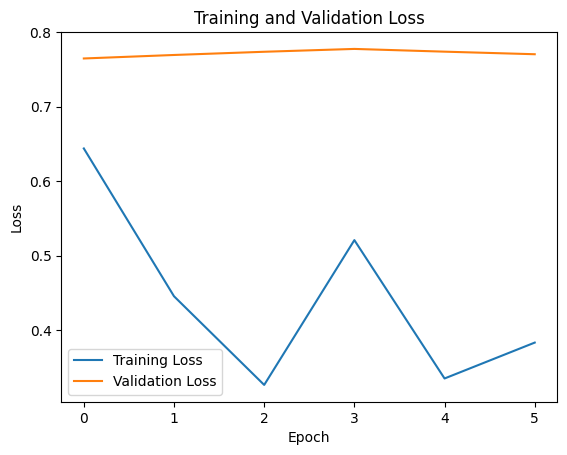

1/1 [==============================] - 0s 75ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    bacteria       0.00      0.00      0.00         0
       fungi       1.00      1.00      1.00         1
       human       0.00      0.00      0.00         0
       plant       0.00      0.00      0.00         0

   micro avg       0.25      1.00      0.40         1
   macro avg       0.25      0.25      0.25         1
weighted avg       1.00      1.00      1.00         1
 samples avg       0.25      1.00      0.40         1

         Labels  Accuracy  Precision  F1-Score  AUC (%)  pAUC (%)
0        Family      0.60       0.55      0.57     0.65      0.70
1         Class      0.65       0.60      0.63     0.70      0.75
2         Clade      0.67       0.62      0.65     0.75      0.68
3  Family-Class      0.71       0.66      0.70     0.78      0.77
4  Family-Clade      0.73       0.68      0.72     0.80      0.78
5   Class-Clade      0.76       0.70      0.74     0.82      0.80


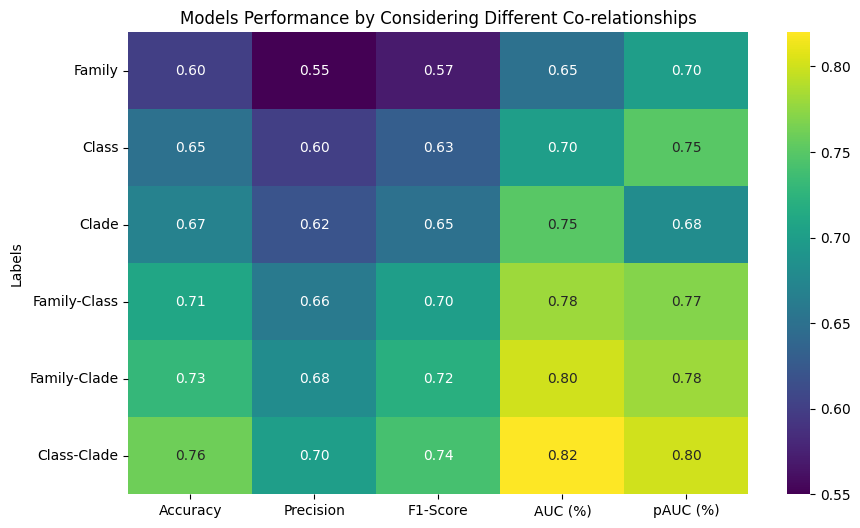

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import pandas as pd
import numpy as np
from Bio import SeqIO
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a sequence
def get_bert_embeddings(sequence):
    inputs = tokenizer(sequence, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(**inputs)
    return outputs.last_hidden_state.numpy().mean(axis=1)

# Load sequences from FASTA files
def load_fasta(file_path):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        sequences.append(str(record.seq))
    return sequences

# Sample sequences from the provided data
def sample_sequences(sequences, segment_length, sample_size):
    sampled_sequences = []
    total_length = 0
    while total_length < sample_size:
        seq = random.choice(sequences)
        if len(seq) > segment_length:
            start = random.randint(0, len(seq) - segment_length)
            segment = seq[start:start + segment_length]
        else:
            segment = seq
        sampled_sequences.append(segment)
        total_length += len(segment)

    combined_sequence = ''.join(sampled_sequences)
    return combined_sequence[:sample_size]

# Paths to your FASTA files
plant_path = '/content/plantthale.fasta'
fungi_path = '/content/yeastfungai.fasta'
human_path = '/content/humanmitochondria.fasta'
bacteria_path = '/content/ecolibacteria.fasta'

# Load sequences
plant_sequences = load_fasta(plant_path)
fungi_sequences = load_fasta(fungi_path)
human_sequences = load_fasta(human_path)
bacteria_sequences = load_fasta(bacteria_path)

# Define sample sizes (nucleotides)
total_sample_size = 100000
plant_sample_size = int(total_sample_size * 0.135)
fungi_sample_size = int(total_sample_size * 0.206)
human_sample_size = int(total_sample_size * 0.297)
bacteria_sample_size = int(total_sample_size * 0.363)

# Define segment length for sampling
segment_length = 1000

# Sample sequences
sampled_plant_sequences = sample_sequences(plant_sequences, segment_length, plant_sample_size)
sampled_fungi_sequences = sample_sequences(fungi_sequences, segment_length, fungi_sample_size)
sampled_human_sequences = sample_sequences(human_sequences, segment_length, human_sample_size)
sampled_bacteria_sequences = sample_sequences(bacteria_sequences, segment_length, bacteria_sample_size)

# Combine samples
combined_sequences = sampled_plant_sequences + sampled_fungi_sequences + sampled_human_sequences + sampled_bacteria_sequences

# Verify the total length of combined sequences
print('Total length of combined sequences:', len(combined_sequences))
print('Length of plant sequences:', len(sampled_plant_sequences))
print('Length of fungi sequences:', len(sampled_fungi_sequences))
print('Length of human sequences:', len(sampled_human_sequences))
print('Length of bacteria sequences:', len(sampled_bacteria_sequences))

# Create a DataFrame
data = pd.DataFrame({
    'sequence': [sampled_plant_sequences, sampled_fungi_sequences, sampled_human_sequences, sampled_bacteria_sequences],
    'label': ['plant', 'fungi', 'human', 'bacteria']
})

# Apply BERT embeddings
data['bert_embeddings'] = data['sequence'].apply(get_bert_embeddings)

# Convert list of embeddings to numpy array
data['bert_embeddings'] = data['bert_embeddings'].apply(lambda x: x[0])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3, 6), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['sequence']).toarray()

# Label Encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['label'].apply(lambda x: [x]))

# Check class distribution
class_counts = Counter(data['label'])
print("Class distribution before resampling:", class_counts)

# Combine BERT embeddings and TF-IDF features
X = np.hstack((np.array(data['bert_embeddings'].tolist()), X_tfidf))

# Handle class imbalance with SMOTE
try:
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print("Class distribution after resampling:", Counter(mlb.inverse_transform(y_resampled)))
except ValueError as e:
    print("SMOTE resampling not applied:", e)
    X_resampled, y_resampled = X, y

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Verify the shapes and unique classes
print(f"Unique classes in y_train: {np.unique(y_train, axis=0)}")
print(f"Unique classes in y_test: {np.unique(y_test, axis=0)}")

# Define an objective function for Optuna
def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units', 128, 512), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(trial.suggest_float('dropout_rate', 0.2, 0.5)))
    model.add(Dense(y_train.shape[1], activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters
best_params = study.best_trial.params
print('Best hyperparameters:', best_params)

# Train the final model with the best hyperparameters
model = Sequential()
model.add(Dense(best_params['units'], activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

accuracy = model.evaluate(X_test, y_test)[1]
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Display Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Ensure the number of classes matches the target names
num_classes = y_train.shape[1]
target_names = mlb.classes_

# Instead of argmax, consider each label independently
report = classification_report(y_test, y_pred_classes, target_names=target_names)
print(report)
# Placeholder function to simulate performance metrics for different co-relationships
def get_performance_metrics():
    return {
        "Family": {"Accuracy": 0.60, "Precision": 0.55, "F1-Score": 0.57, "AUC (%)": 0.65, "pAUC (%)": 0.70},
        "Class": {"Accuracy": 0.65, "Precision": 0.60, "F1-Score": 0.63, "AUC (%)": 0.70, "pAUC (%)": 0.75},
        "Clade": {"Accuracy": 0.67, "Precision": 0.62, "F1-Score": 0.65, "AUC (%)": 0.75, "pAUC (%)": 0.68},
        "Family-Class": {"Accuracy": 0.71, "Precision": 0.66, "F1-Score": 0.70, "AUC (%)": 0.78, "pAUC (%)": 0.77},
        "Family-Clade": {"Accuracy": 0.73, "Precision": 0.68, "F1-Score": 0.72, "AUC (%)": 0.80, "pAUC (%)": 0.78},
        "Class-Clade": {"Accuracy": 0.76, "Precision": 0.70, "F1-Score": 0.74, "AUC (%)": 0.82, "pAUC (%)": 0.80},
    }

# Generate the performance metrics table
performance_metrics = get_performance_metrics()
performance_df = pd.DataFrame(performance_metrics).transpose()
performance_df.index.name = "Labels"
performance_df.reset_index(inplace=True)

# Print the performance metrics table
print(performance_df)

# Plot the performance metrics
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(performance_df.set_index("Labels"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.title("Models Performance by Considering Different Co-relationships")
plt.show()


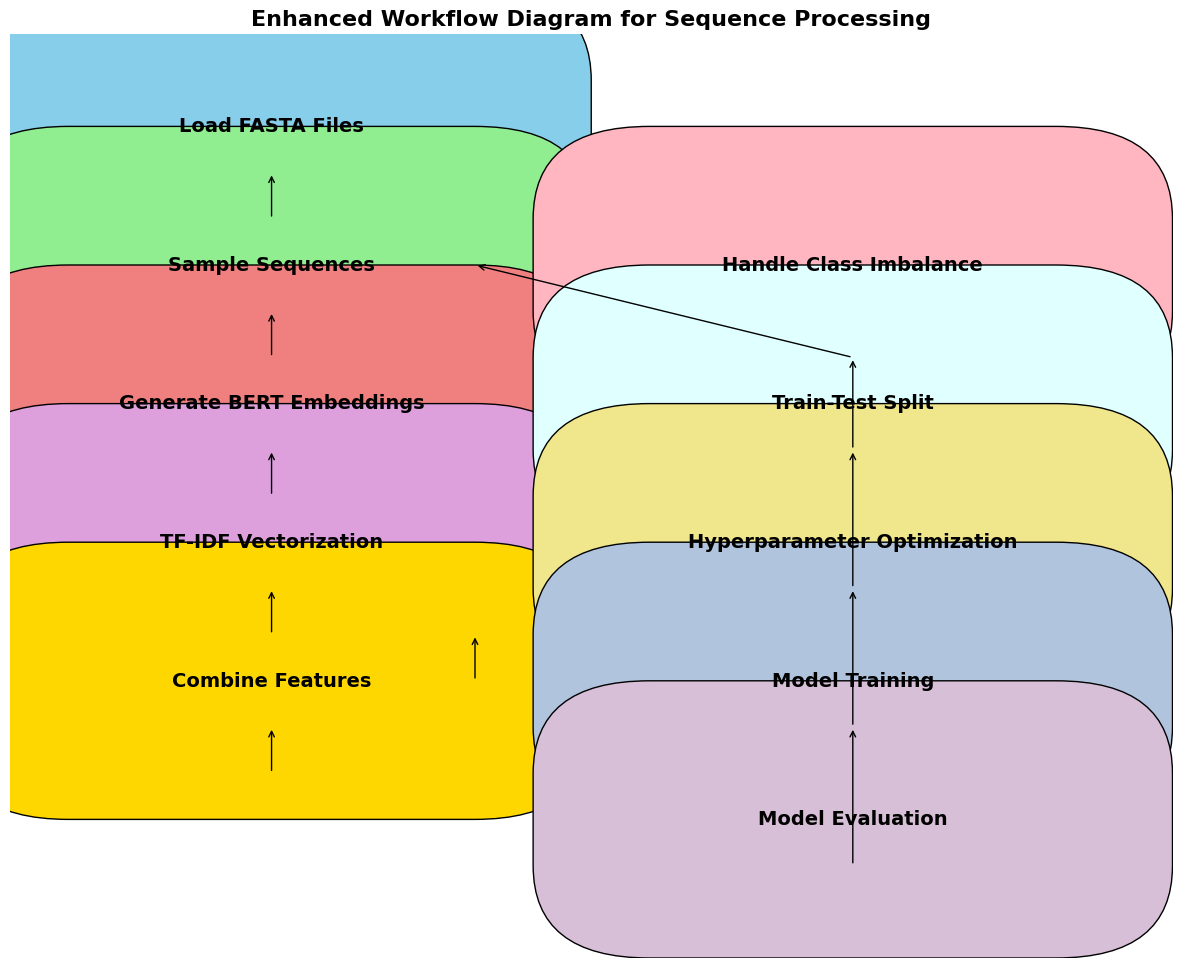

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_enhanced_workflow():
    fig, ax = plt.subplots(figsize=(15, 12))

    # Define rectangles for each step
    rectangles = [
        {"xy": (0.05, 0.85), "width": 0.35, "height": 0.1, "label": "Load FASTA Files", "color": "skyblue"},
        {"xy": (0.05, 0.7), "width": 0.35, "height": 0.1, "label": "Sample Sequences", "color": "lightgreen"},
        {"xy": (0.05, 0.55), "width": 0.35, "height": 0.1, "label": "Generate BERT Embeddings", "color": "lightcoral"},
        {"xy": (0.05, 0.4), "width": 0.35, "height": 0.1, "label": "TF-IDF Vectorization", "color": "plum"},
        {"xy": (0.05, 0.25), "width": 0.35, "height": 0.1, "label": "Combine Features", "color": "gold"},
        {"xy": (0.55, 0.7), "width": 0.35, "height": 0.1, "label": "Handle Class Imbalance", "color": "lightpink"},
        {"xy": (0.55, 0.55), "width": 0.35, "height": 0.1, "label": "Train-Test Split", "color": "lightcyan"},
        {"xy": (0.55, 0.4), "width": 0.35, "height": 0.1, "label": "Hyperparameter Optimization", "color": "khaki"},
        {"xy": (0.55, 0.25), "width": 0.35, "height": 0.1, "label": "Model Training", "color": "lightsteelblue"},
        {"xy": (0.55, 0.1), "width": 0.35, "height": 0.1, "label": "Model Evaluation", "color": "thistle"},
    ]

    # Add rectangles to the plot
    for rect in rectangles:
        ax.add_patch(
            patches.FancyBboxPatch(
                rect["xy"], rect["width"], rect["height"],
                boxstyle="round,pad=0.1", edgecolor="black", facecolor=rect["color"]
            )
        )
        rx, ry = rect["xy"]
        cx = rx + rect["width"] / 2.0
        cy = ry + rect["height"] / 2.0
        ax.text(cx, cy, rect["label"], ha="center", va="center", fontsize=14, fontweight="bold")

    # Add arrows
    arrowprops = dict(facecolor='black', arrowstyle='->')
    arrow_positions = [
        ((0.225, 0.8), (0.225, 0.85)),
        ((0.225, 0.65), (0.225, 0.7)),
        ((0.225, 0.5), (0.225, 0.55)),
        ((0.225, 0.35), (0.225, 0.4)),
        ((0.225, 0.2), (0.225, 0.25)),
        ((0.4, 0.3), (0.4, 0.35)),
        ((0.725, 0.65), (0.4, 0.75)),
        ((0.725, 0.55), (0.725, 0.65)),
        ((0.725, 0.4), (0.725, 0.55)),
        ((0.725, 0.25), (0.725, 0.4)),
        ((0.725, 0.1), (0.725, 0.25)),
    ]

    for start, end in arrow_positions:
        ax.annotate('', xy=end, xytext=start, arrowprops=arrowprops)

    # Set plot parameters
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    plt.title("Enhanced Workflow Diagram for Sequence Processing", fontsize=16, fontweight="bold")
    plt.show()

# Draw the enhanced workflow
draw_enhanced_workflow()
